In [1]:
import pandas as pd
import numpy as np
import pylab as py
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv(r"C:\Users\mjais\Downloads\ToyotaCorolla.csv", encoding='latin1')
raw_data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
print('Number of Rows and Columns {}'.format(raw_data.shape))

Number of Rows and Columns (1436, 38)


In [4]:
raw_data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [5]:
raw_data = raw_data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
raw_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
raw_data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
toyota_corolla = raw_data.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyota_corolla.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [9]:
toyota_corolla.isnull().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [10]:
toyota_corolla[toyota_corolla.duplicated()].shape

(1, 9)

In [11]:
toyota_corolla[toyota_corolla.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [12]:
toyota_corolla = toyota_corolla.drop_duplicates().reset_index(drop=True)
toyota_corolla[toyota_corolla.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


In [13]:
discrete_feature = [feature for feature in toyota_corolla.columns if len(toyota_corolla[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 5


In [14]:
continuous_feature = [feature for feature in toyota_corolla.columns if toyota_corolla[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 4


In [15]:
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(9,5))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm', plot=pylab)

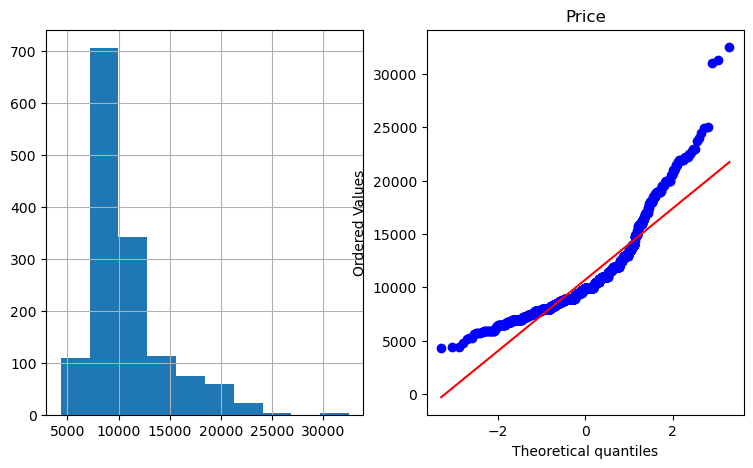

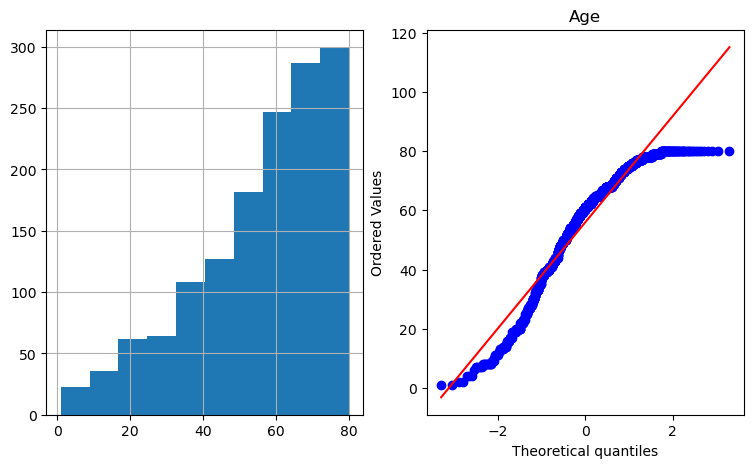

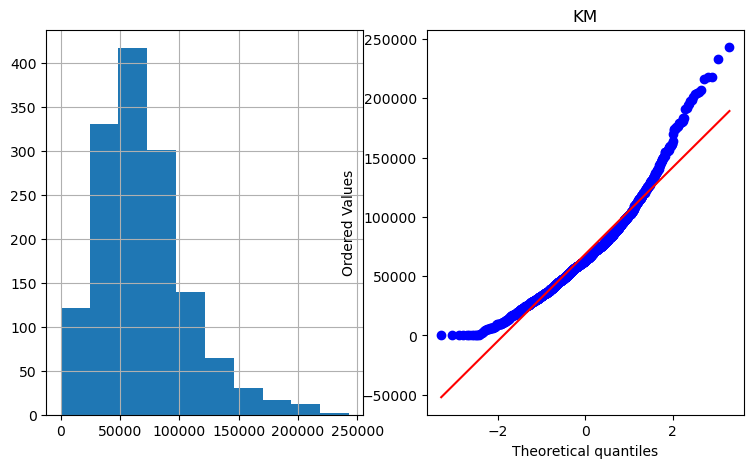

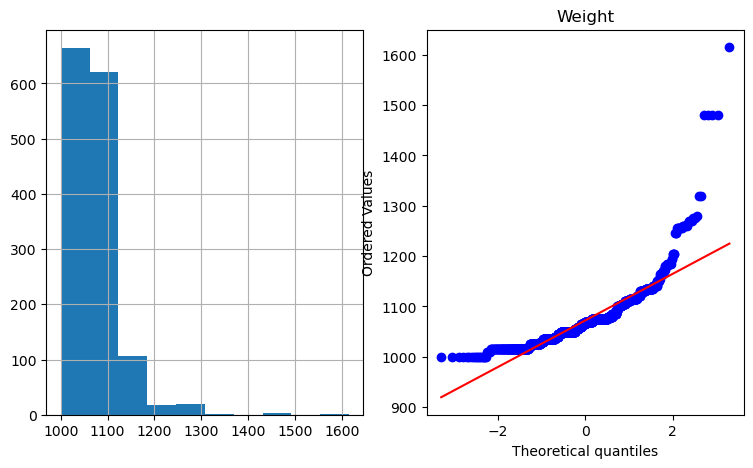

In [16]:
plot_data(toyota_corolla,'Price')
plt.title('Price')
plot_data(toyota_corolla,'Age')
plt.title('Age')
plot_data(toyota_corolla,'KM')
plt.title('KM')
plot_data(toyota_corolla,'Weight')
plt.title('Weight')
plt.show()

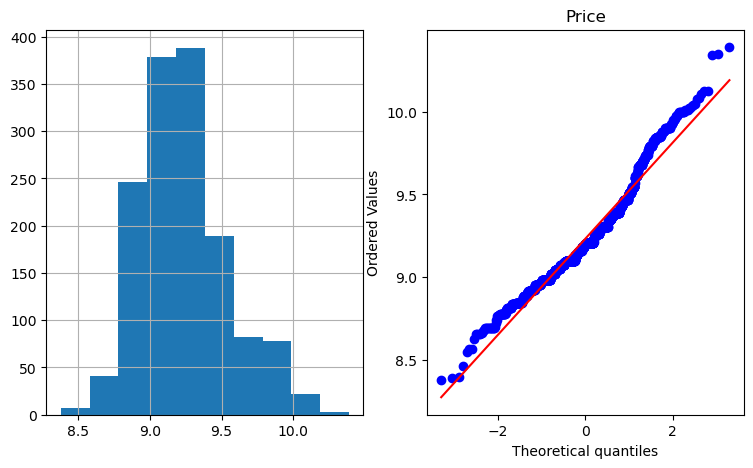

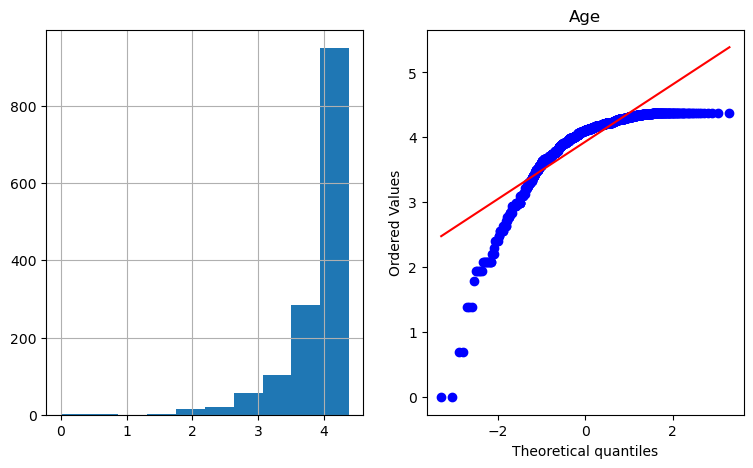

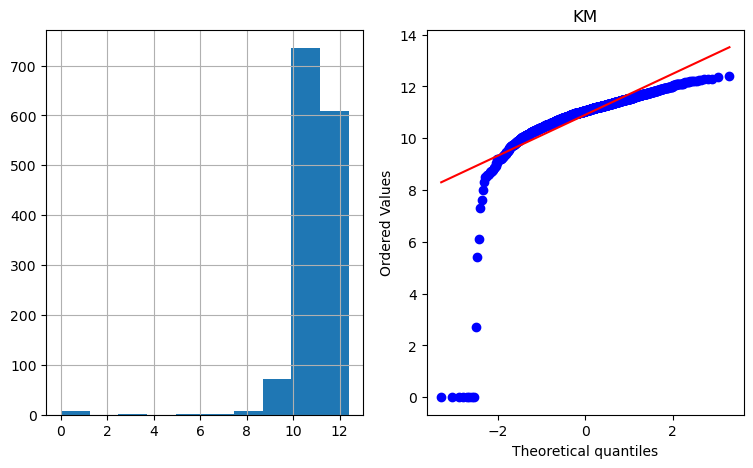

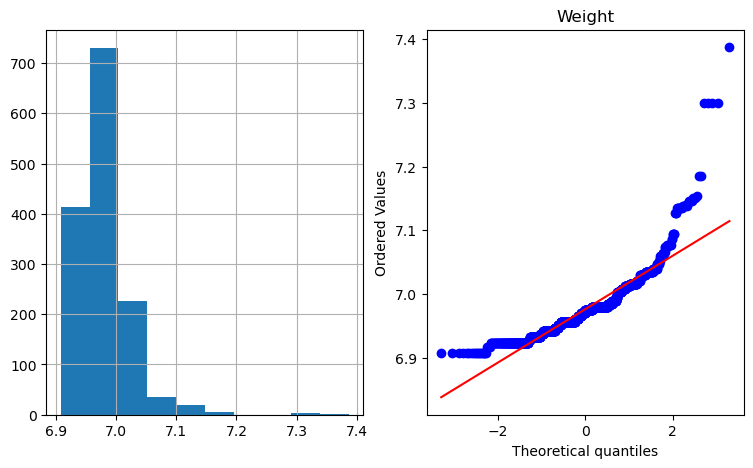

In [17]:
toyota_corolla1 = toyota_corolla.copy()
toyota_corolla1[continuous_feature] = np.log(toyota_corolla1[continuous_feature])

plot_data(toyota_corolla1,'Price')
plt.title('Price')
plot_data(toyota_corolla1,'Age')
plt.title('Age')
plot_data(toyota_corolla1,'KM')
plt.title('KM')
plot_data(toyota_corolla1,'Weight')
plt.title('Weight')
plt.show()

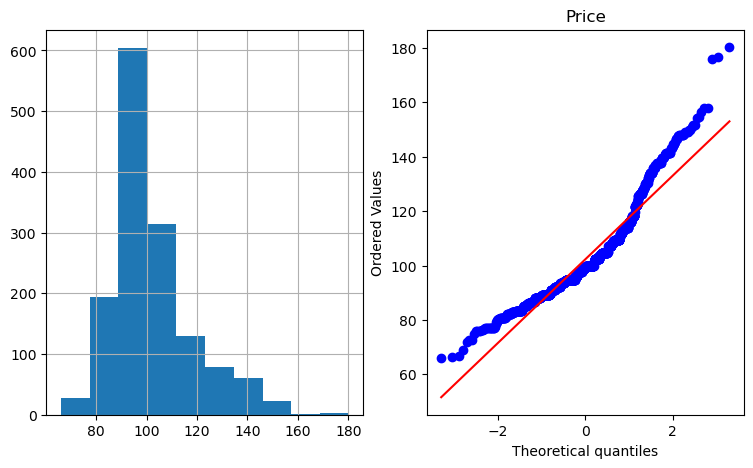

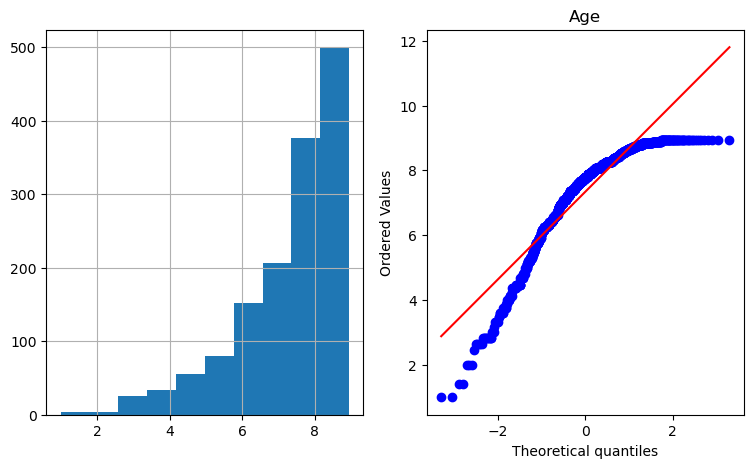

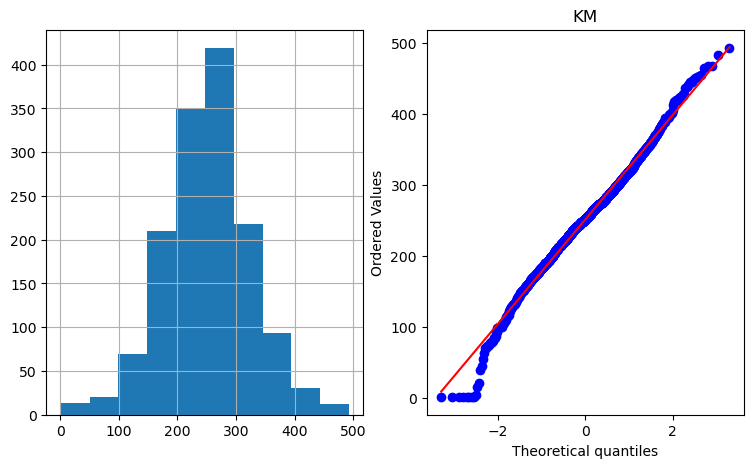

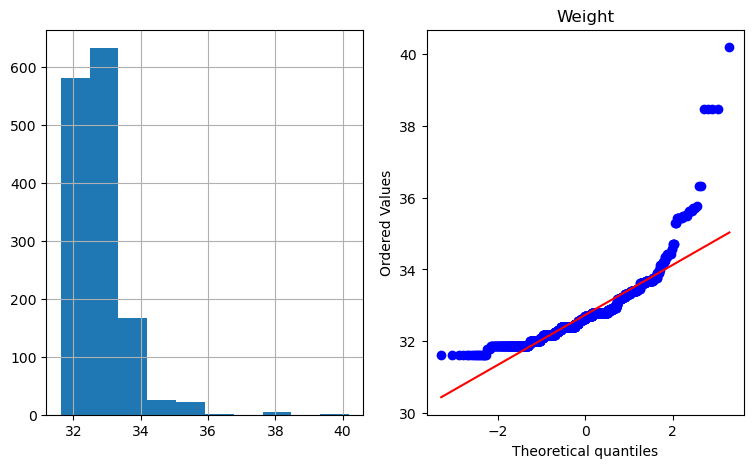

In [18]:
toyota_corolla2 = toyota_corolla.copy()
toyota_corolla2[continuous_feature] = np.sqrt(toyota_corolla2[continuous_feature])

plot_data(toyota_corolla2,'Price')
plt.title('Price')
plot_data(toyota_corolla2,'Age')
plt.title('Age')
plot_data(toyota_corolla2,'KM')
plt.title('KM')
plot_data(toyota_corolla2,'Weight')
plt.title('Weight')
plt.show()

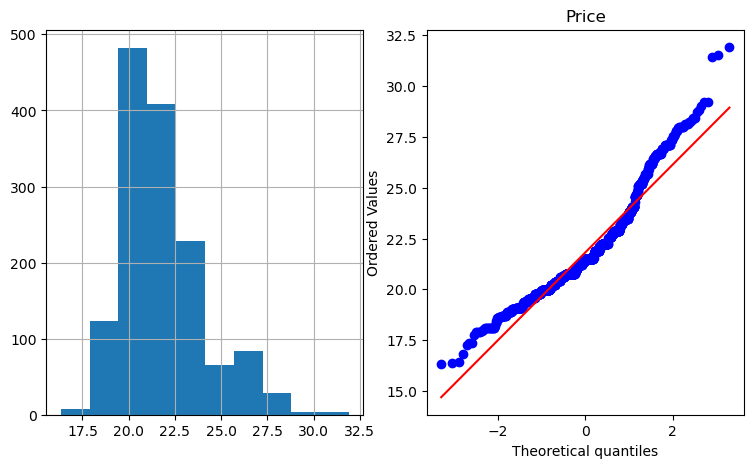

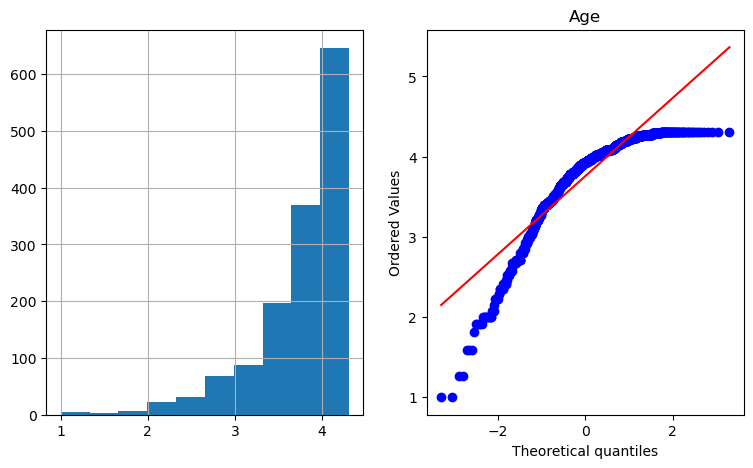

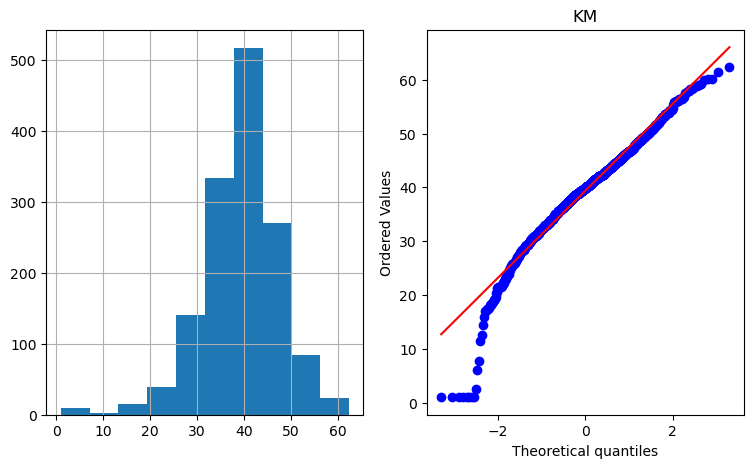

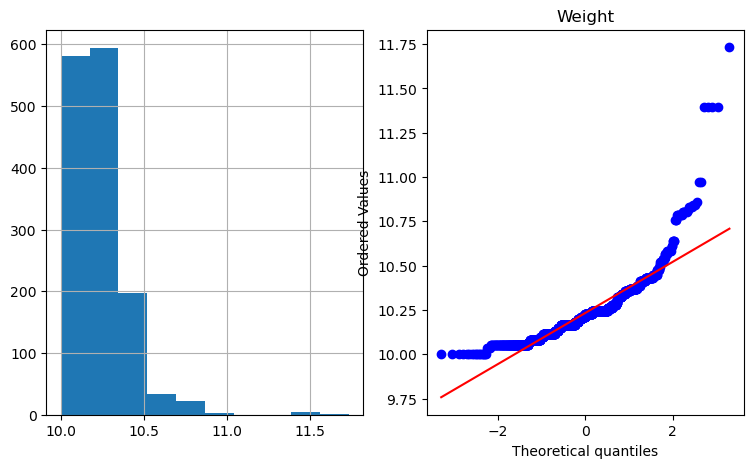

In [19]:
toyota_corolla3 = toyota_corolla.copy()
toyota_corolla3[continuous_feature] = np.cbrt(toyota_corolla3[continuous_feature])

plot_data(toyota_corolla3,'Price')
plt.title('Price')
plot_data(toyota_corolla3,'Age')
plt.title('Age')
plot_data(toyota_corolla3,'KM')
plt.title('KM')
plot_data(toyota_corolla3,'Weight')
plt.title('Weight')
plt.show()

In [20]:
toyota_corolla.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [21]:
from scipy.stats import shapiro

print('Price feature  :',shapiro(toyota_corolla.Price),'\n'
      'Age feature    :',shapiro(toyota_corolla.Age),'\n'
      'Weight feature :',shapiro(toyota_corolla.Weight),'\n'
      'KM feature     :',shapiro(toyota_corolla.KM))

Price feature  : ShapiroResult(statistic=0.8534729480743408, pvalue=1.5960294063332542e-34) 
Age feature    : ShapiroResult(statistic=0.926694929599762, pvalue=6.738004885543532e-26) 
Weight feature : ShapiroResult(statistic=0.7825542688369751, pvalue=5.042796731627146e-40) 
KM feature     : ShapiroResult(statistic=0.9475831389427185, pvalue=3.444094263209402e-22)


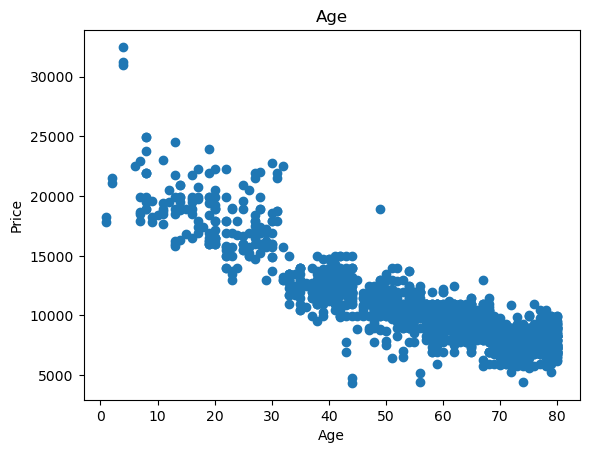

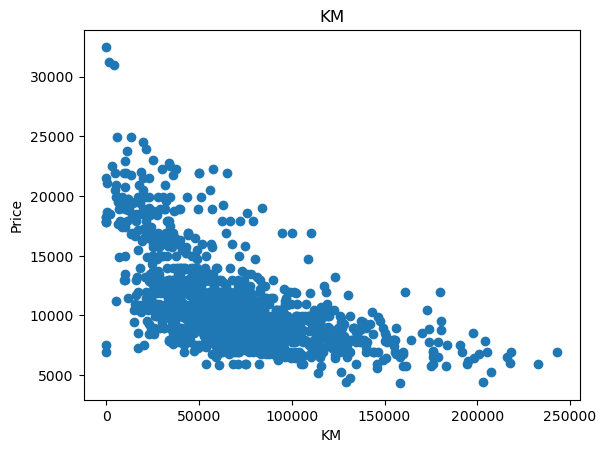

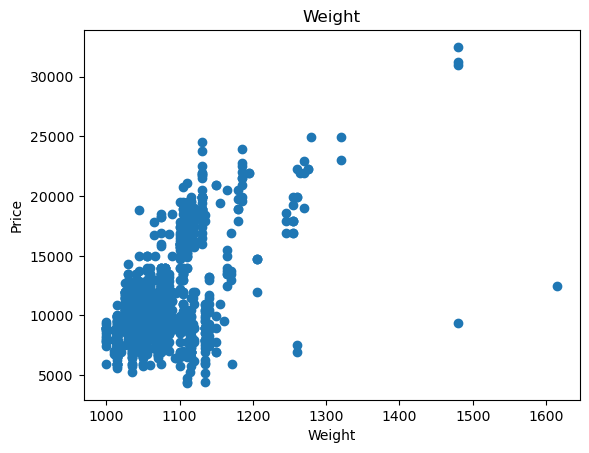

In [22]:
for feature in continuous_feature:
    if feature!="Price":
        df = toyota_corolla.copy()         
        plt.scatter(df[feature],df['Price'])
        plt.xlabel(feature)
        plt.ylabel('Price')
        plt.title(feature)
        plt.show()

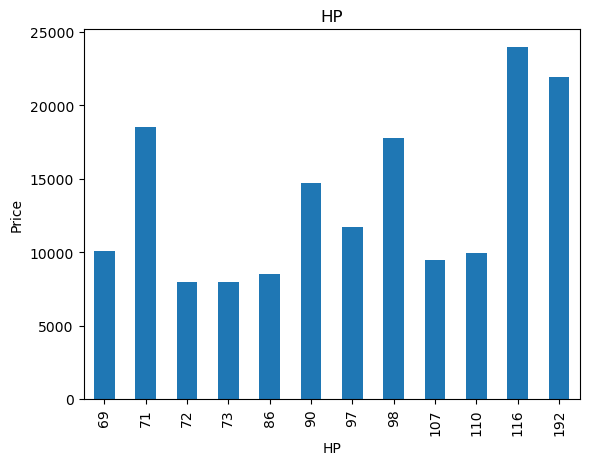

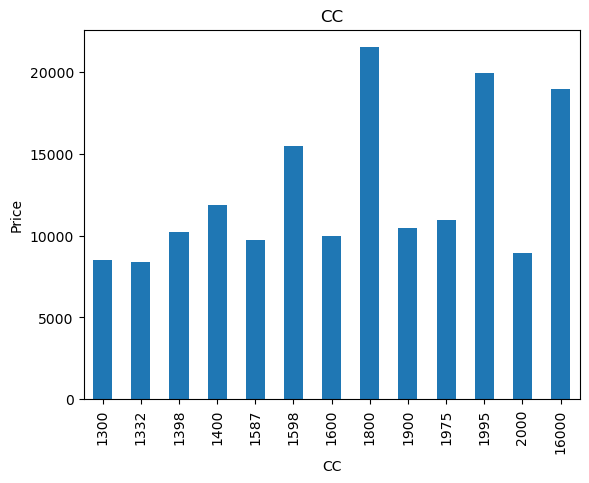

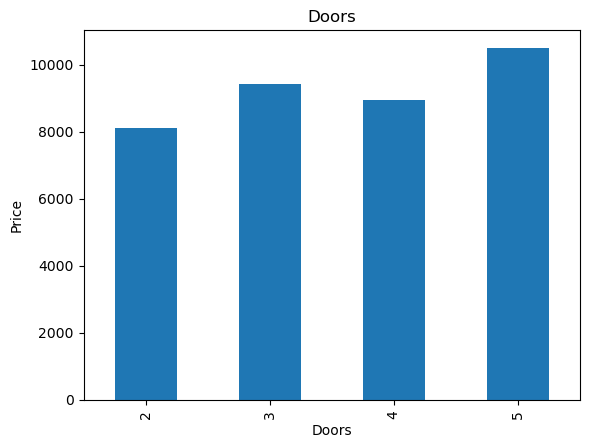

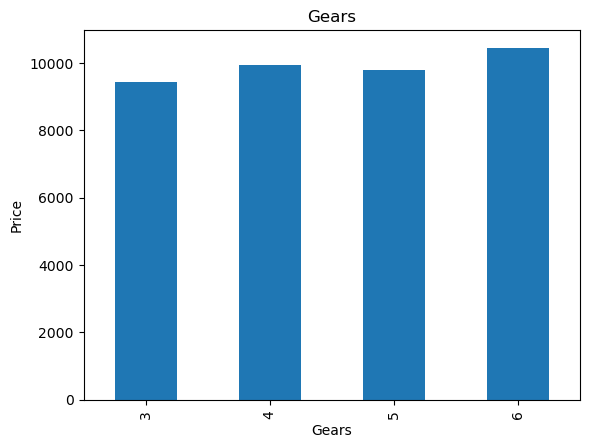

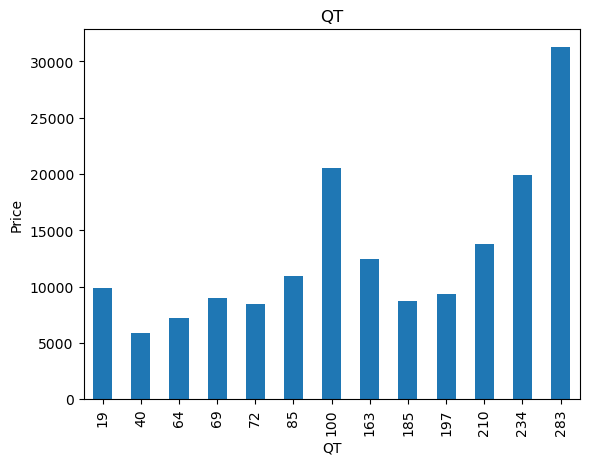

In [23]:
for feature in discrete_feature:
    toyota_corolla = toyota_corolla.copy()
    toyota_corolla.groupby(feature)["Price"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(feature)
    plt.show()

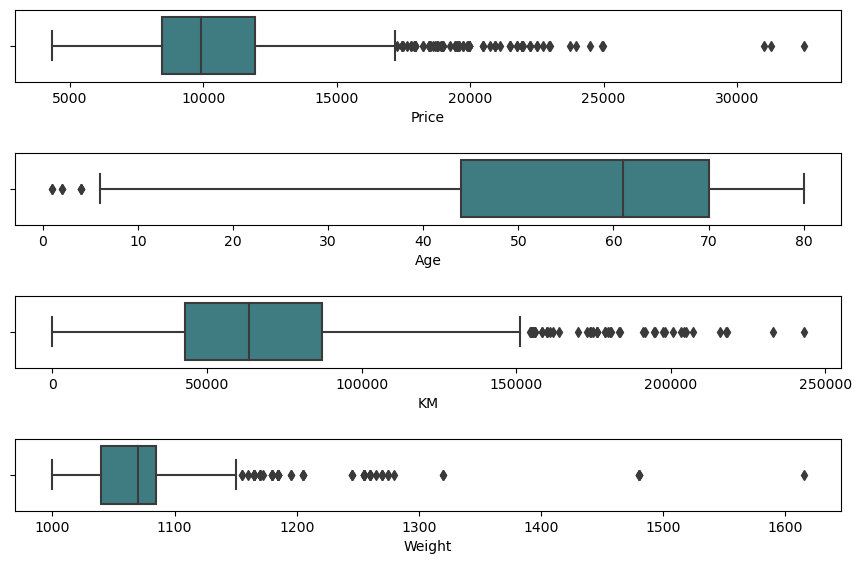

In [24]:
toyota_corolla = toyota_corolla.copy() 
fig, axes=plt.subplots(4,1,figsize=(9,6),sharex=False,sharey=False)
sns.boxplot(x='Price',data=toyota_corolla,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=toyota_corolla,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=toyota_corolla,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=toyota_corolla,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

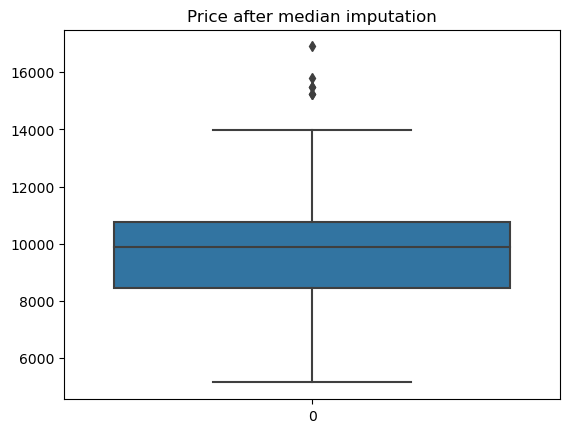

In [25]:
toyota_corolla4 = toyota_corolla.copy()
for i in toyota_corolla['Price']:
    q1 = np.quantile(toyota_corolla4.Price,0.25)
    q3 = np.quantile(toyota_corolla4.Price,0.75)
    med = np.median(toyota_corolla4.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        toyota_corolla4['Price'] = toyota_corolla4['Price'].replace(i, np.median(toyota_corolla4['Price']))
sns.boxplot(toyota_corolla4['Price'])
plt.title('Price after median imputation')
plt.show()

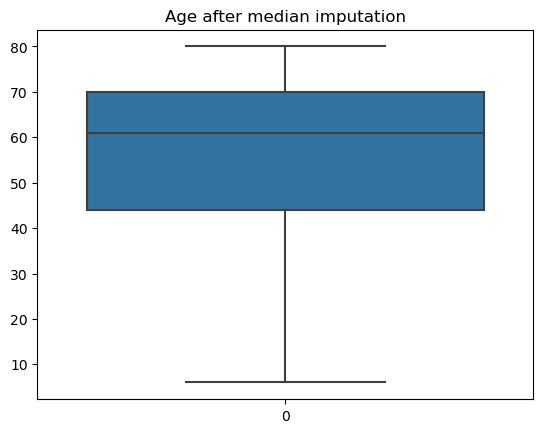

In [26]:
for i in toyota_corolla['Age']:
    q1 = np.quantile(toyota_corolla4.Age,0.25)
    q3 = np.quantile(toyota_corolla4.Age,0.75)
    med = np.median(toyota_corolla4.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        toyota_corolla4['Age'] = toyota_corolla4['Age'].replace(i, np.median(toyota_corolla4['Age']))
sns.boxplot(toyota_corolla4['Age'])
plt.title('Age after median imputation')
plt.show()

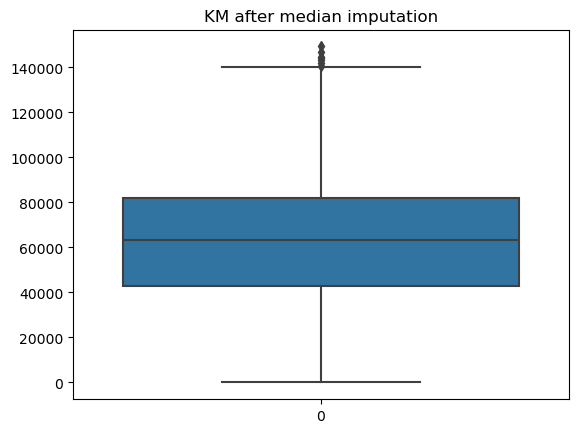

In [27]:
for i in toyota_corolla['KM']:
    q1 = np.quantile(toyota_corolla4.KM,0.25)
    q3 = np.quantile(toyota_corolla4.KM,0.75)
    med = np.median(toyota_corolla4.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        toyota_corolla4['KM'] = toyota_corolla4['KM'].replace(i, np.median(toyota_corolla4['KM']))
sns.boxplot(toyota_corolla4['KM'])
plt.title('KM after median imputation')
plt.show()


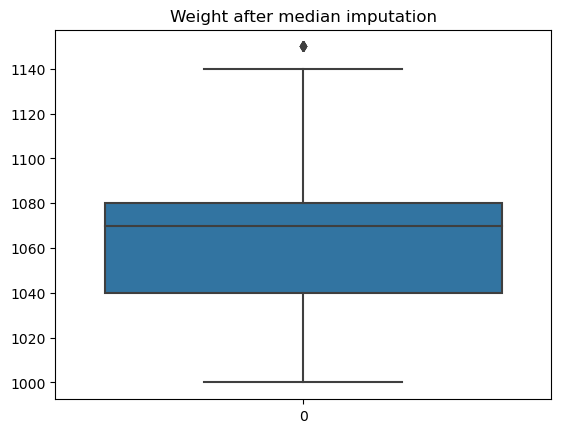

In [28]:
for i in toyota_corolla['Weight']:
    q1 = np.quantile(toyota_corolla4.Weight,0.25)
    q3 = np.quantile(toyota_corolla.Weight,0.75)
    med = np.median(toyota_corolla4.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        toyota_corolla4['Weight'] = toyota_corolla4['Weight'].replace(i, np.median(toyota_corolla4['Weight']))
sns.boxplot(toyota_corolla4['Weight'])
plt.title('Weight after median imputation')
plt.show()

In [29]:
median_imputation_model = smf.ols("Price ~ Age + KM + Weight", data = toyota_corolla4).fit()
# Finding rsquared values
print('R-squared     :',median_imputation_model.rsquared.round(3))
print('Adj.R-squared :',median_imputation_model.rsquared_adj.round(3))

R-squared     : 0.343
Adj.R-squared : 0.341


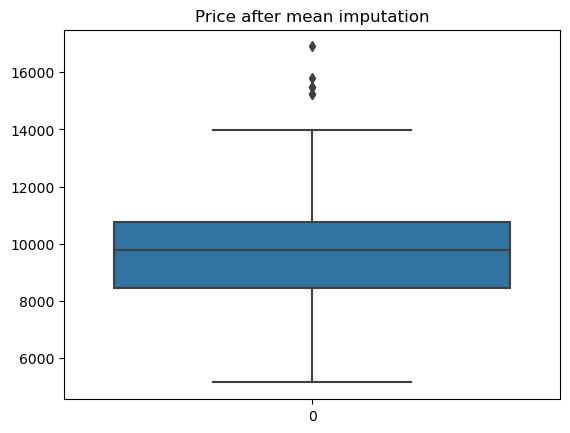

In [30]:
toyota_corolla5 = toyota_corolla.copy()
for i in toyota_corolla['Price']:
    q1 = np.quantile(toyota_corolla5.Price,0.25)
    q3 = np.quantile(toyota_corolla5.Price,0.75)
    med = np.median(toyota_corolla5.Price)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        toyota_corolla5['Price'] = toyota_corolla5['Price'].replace(i, np.mean(toyota_corolla5['Price']))
sns.boxplot(toyota_corolla5['Price'])
plt.title('Price after mean imputation')
plt.show()

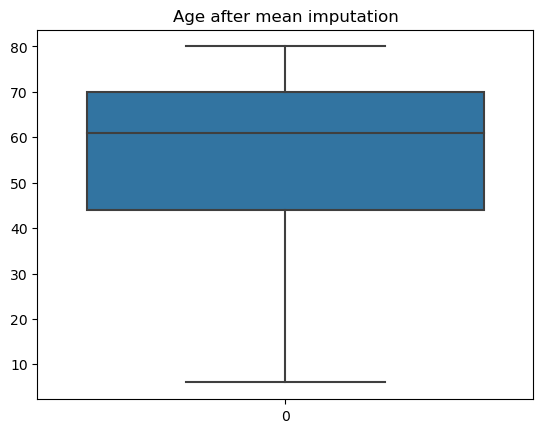

In [31]:
for i in toyota_corolla['Age']:
    q1 = np.quantile(toyota_corolla5.Age,0.25)
    q3 = np.quantile(toyota_corolla5.Age,0.75)
    med = np.median(toyota_corolla5.Age)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        toyota_corolla5['Age'] = toyota_corolla5['Age'].replace(i, np.mean(toyota_corolla5['Age']))
sns.boxplot(toyota_corolla5['Age'])
plt.title('Age after mean imputation')
plt.show()

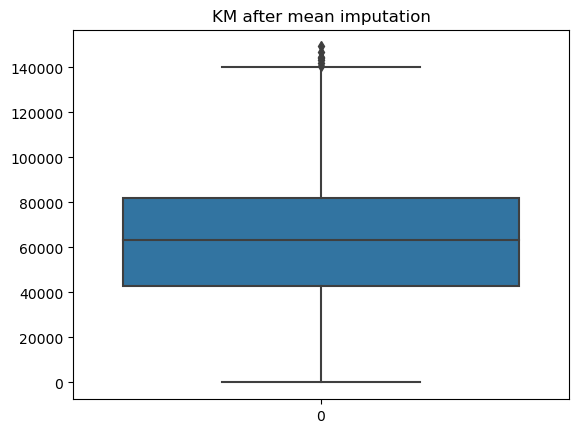

In [32]:
for i in toyota_corolla['KM']:
    q1 = np.quantile(toyota_corolla5.KM,0.25)
    q3 = np.quantile(toyota_corolla5.KM,0.75)
    med = np.median(toyota_corolla5.KM)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        toyota_corolla5['KM'] = toyota_corolla5['KM'].replace(i, np.mean(toyota_corolla5['KM']))
sns.boxplot(toyota_corolla5['KM'])
plt.title('KM after mean imputation')
plt.show()

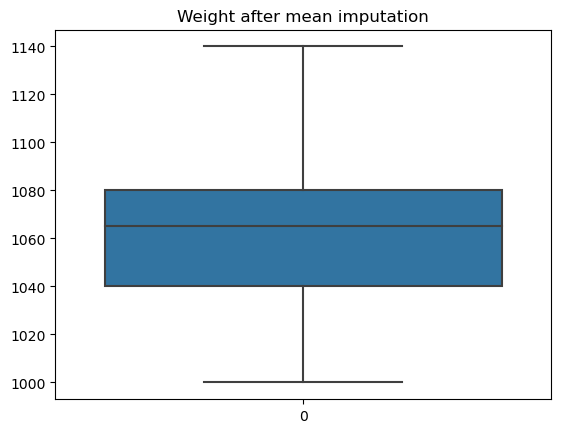

In [33]:
for i in toyota_corolla['Weight']:
    q1 = np.quantile(toyota_corolla5.Weight,0.25)
    q3 = np.quantile(toyota_corolla5.Weight,0.75)
    med = np.median(toyota_corolla5.Weight)
    iqr = q3 - q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    if i > upper_bound or i < lower_bound:
        toyota_corolla5['Weight'] = toyota_corolla5['Weight'].replace(i, np.mean(toyota_corolla5['Weight']))
sns.boxplot(toyota_corolla5['Weight'])
plt.title('Weight after mean imputation')
plt.show()

In [34]:
mean_imputation_model = smf.ols("Price ~ Age + KM + Weight", data = toyota_corolla5).fit()
# Finding rsquared values
print('R-squared     :',mean_imputation_model.rsquared.round(3))
print('Adj.R-squared :',mean_imputation_model.rsquared_adj.round(3))

R-squared     : 0.388
Adj.R-squared : 0.387


In [35]:
toyota_corolla6 = toyota_corolla.copy()
def drop_outliers(data, field_name):
    iqr = 1.5*(np.percentile(data[field_name], 75) - np.percentile(data[field_name], 25))
    data.drop(data[data[field_name] > (iqr + np.percentile(data[field_name], 75))].index, inplace=True)
    data.drop(data[data[field_name] < (np.percentile(data[field_name], 25) - iqr)].index, inplace=True)

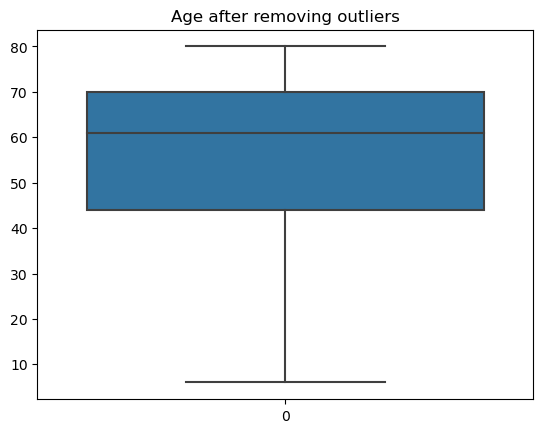

In [36]:
drop_outliers(toyota_corolla6, 'Age')
sns.boxplot(toyota_corolla6.Age)
plt.title('Age after removing outliers')
plt.show()

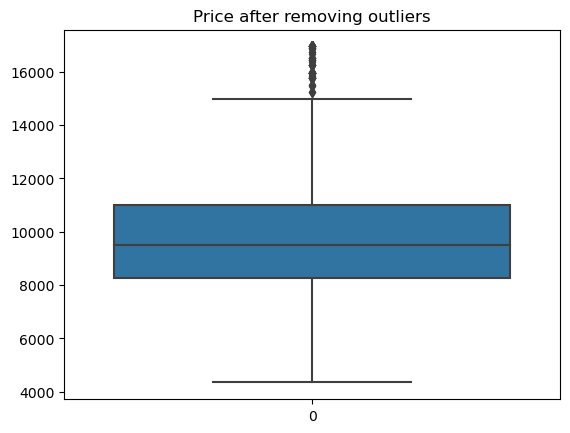

In [37]:
drop_outliers(toyota_corolla6, 'Price')
sns.boxplot(toyota_corolla6.Price)
plt.title('Price after removing outliers')
plt.show()

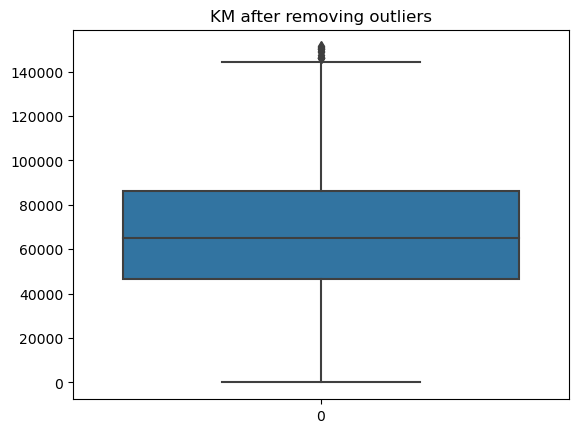

In [38]:
drop_outliers(toyota_corolla6, 'KM')
sns.boxplot(toyota_corolla6.KM)
plt.title('KM after removing outliers')
plt.show()

In [40]:
removed_outlier_model = smf.ols("Price ~ Age + KM + Weight", data = toyota_corolla6).fit()
# Finding rsquared values
print('R-squared     :',removed_outlier_model.rsquared.round(3))
print('Adj.R-squared :',removed_outlier_model.rsquared_adj.round(3))

R-squared     : 0.784
Adj.R-squared : 0.784


In [41]:
np.sqrt(removed_outlier_model.mse_resid)

1057.4686075719258

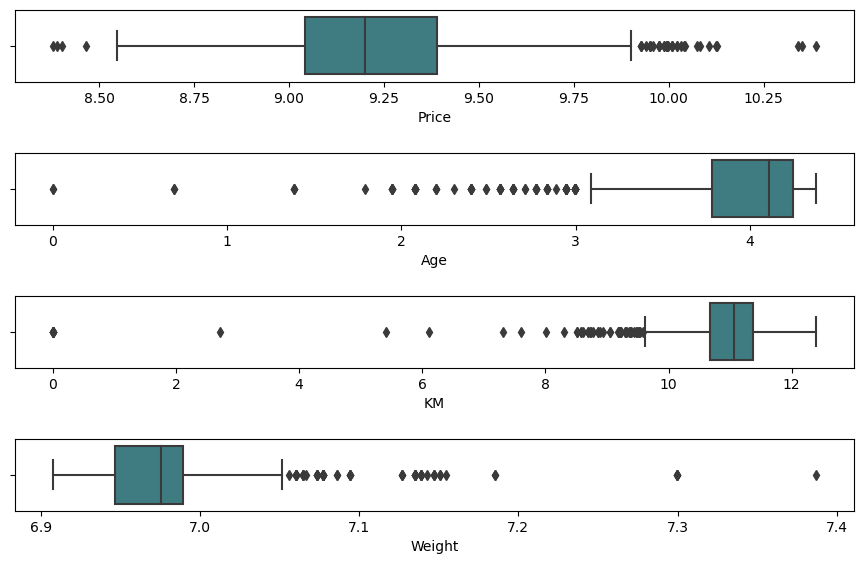

In [42]:
toyota_corolla7 = toyota_corolla.copy()
toyota_corolla7[continuous_feature]=np.log(toyota_corolla7[continuous_feature])
    
fig, axes=plt.subplots(4,1,figsize=(9,6),sharex=False,sharey=False)
sns.boxplot(x='Price',data=toyota_corolla7,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=toyota_corolla7,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=toyota_corolla7,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=toyota_corolla7,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

In [43]:
log_transfomed = toyota_corolla.copy()
log_transfomed[continuous_feature] = np.log(log_transfomed[continuous_feature])
log_transformed_model = smf.ols("Price ~ Age + KM + Weight", data = log_transfomed).fit()
# Finding rsquared values
print('R-squared     :',log_transformed_model.rsquared.round(3))
print('Adj.R-squared :',log_transformed_model.rsquared_adj.round(3))

R-squared     : 0.707
Adj.R-squared : 0.706


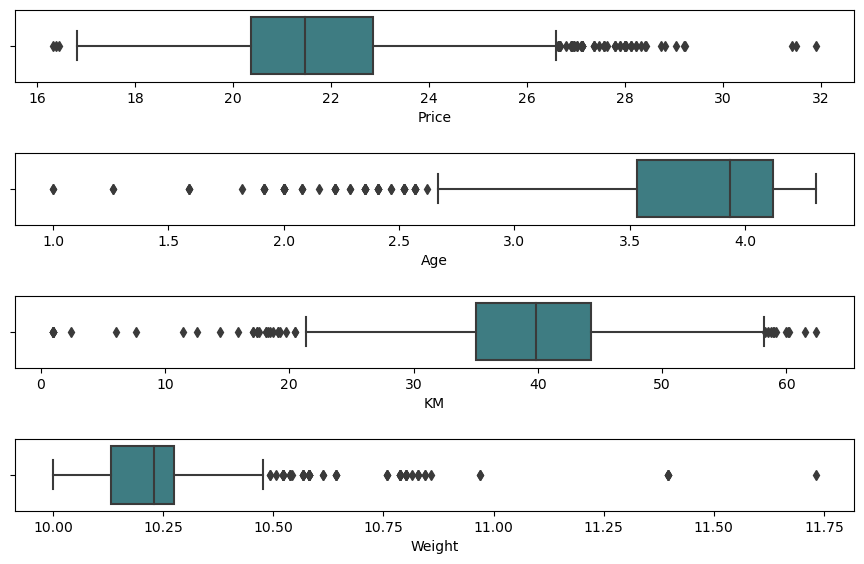

In [44]:
toyota_corolla8 = toyota_corolla.copy()
toyota_corolla8[continuous_feature]=np.cbrt(toyota_corolla8[continuous_feature])

fig, axes=plt.subplots(4,1,figsize=(9,6),sharex=False,sharey=False)
sns.boxplot(x='Price',data=toyota_corolla8,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=toyota_corolla8,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=toyota_corolla8,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=toyota_corolla8,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

In [45]:
cube_root_transfomed = toyota_corolla.copy()
cube_root_transfomed[continuous_feature]=np.cbrt(cube_root_transfomed[continuous_feature])
cube_root_transformed_model = smf.ols("Price ~ Age + KM + Weight", data = cube_root_transfomed).fit()
# Finding rsquared values
print('R-squared     :',cube_root_transformed_model.rsquared.round(3))
print('Adj.R-squared :',cube_root_transformed_model.rsquared_adj.round(3))

R-squared     : 0.815
Adj.R-squared : 0.814


In [46]:
toyota_corolla.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

In [47]:
raw_data_model = smf.ols("Price ~ Age + KM + Weight + HP + CC + Gears + QT + Doors", data = toyota_corolla).fit()
# Finding rsquared values
print('R-squared     :',raw_data_model.rsquared.round(3))
print('Adj.R-squared :',raw_data_model.rsquared_adj.round(3))

R-squared     : 0.863
Adj.R-squared : 0.862


In [48]:
np.sqrt(raw_data_model.mse_resid)

1341.8046186938675

In [49]:
influence_points = raw_data_model.get_influence()
c, p_value = influence_points.cooks_distance
c, p_value

(array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
        8.04110550e-07, 6.99854767e-04, 1.08408002e-02]),
 array([1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.99999998]))

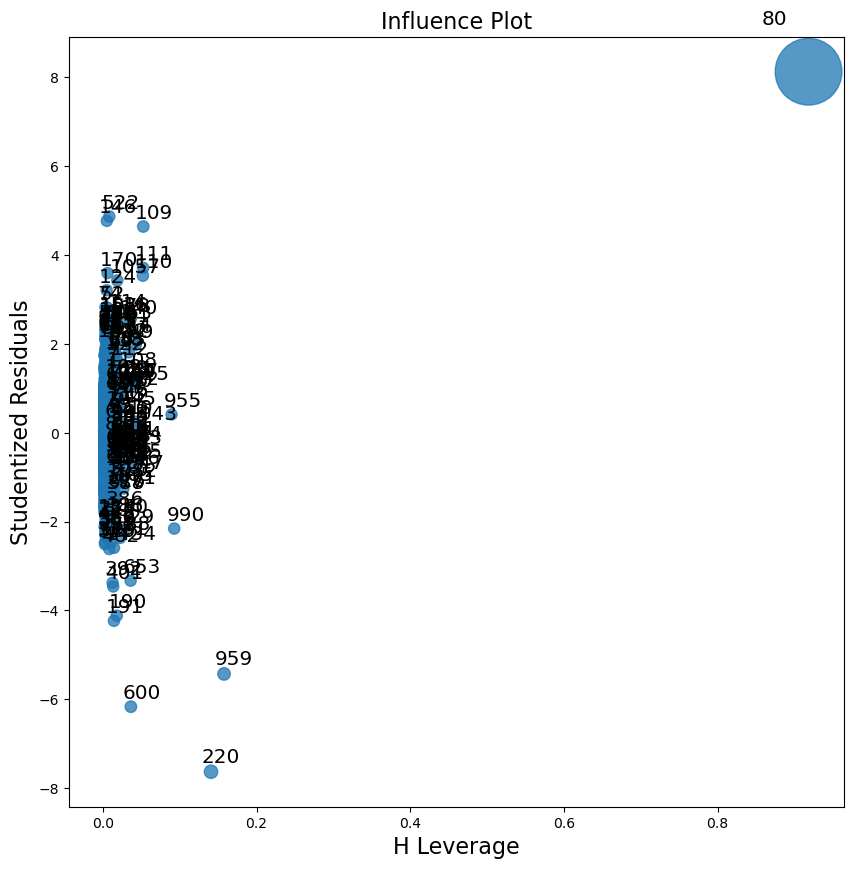

In [50]:
fig,ax = plt.subplots(figsize=(10,10))
fig = influence_plot(raw_data_model,ax = ax)
plt.show()

In [51]:

k = toyota_corolla.shape[1]
n = toyota_corolla.shape[0]
leverage_cutoff = (3*(k+1))/n
print('Cut-off line at',np.round(leverage_cutoff,3))

Cut-off line at 0.021


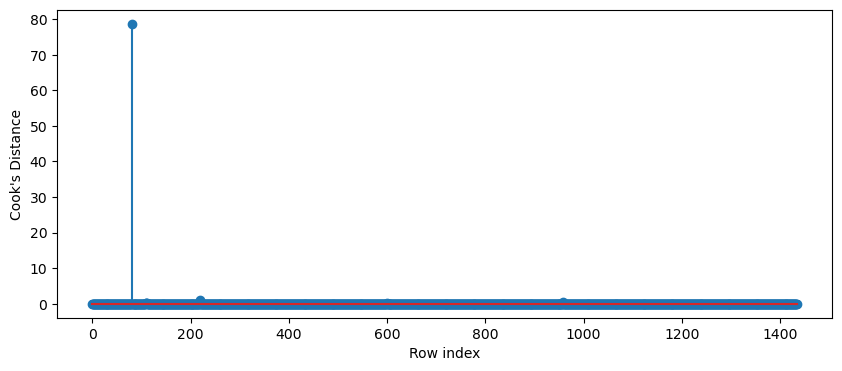

In [52]:
fig = plt.figure(figsize = (10,4))
x = [0,48]
y = [0.1,0.1]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.05,0.05]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(toyota_corolla)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [53]:
np.argmax(c), np.max(c)

(80, 78.72950582247998)

In [54]:
toyota_corolla[toyota_corolla.index.isin([80])] 

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [55]:
dataframe = toyota_corolla.copy()
dataframe = dataframe.drop(dataframe.index[[80]],axis=0).reset_index(drop=True)
dataframe.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [56]:
toyota_corolla.shape

(1435, 9)

In [57]:
dataframe.shape

(1434, 9)

In [58]:
while raw_data_model.rsquared < 0.90:
    for c in [np.max(c)>leverage_cutoff]:
        raw_data_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=dataframe).fit()
        (c,_)=raw_data_model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        dataframe=dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        dataframe
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=dataframe).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741538
Thus model accuracy is improved to 0.8882395145171204
Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319987
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605556
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139027
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147551
Thus model accuracy is improved to 0.8949455651565241
Thus model accuracy is impro

In [59]:
k = dataframe.shape[1]
n = dataframe.shape[0]
leverage_cutoff = (3*(k+1))/n
while np.max(c)>leverage_cutoff:
    model = smf.ols('Price ~ Age + KM + HP + CC + Doors + Gears + QT + Weight', data=dataframe).fit()
    (c,_) = model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    dataframe = dataframe.drop(dataframe.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    dataframe
else:
    final_model = smf.ols('Price ~ Age + KM + HP + CC + Doors + Gears + QT + Weight',data=dataframe).fit()
    final_model.rsquared , final_model.aic
    print("This model accuracy is improved to",final_model.rsquared)

This model accuracy is improved to 0.9003762532318558


In [60]:
influence_points = final_model.get_influence()
c, p_value = influence_points.cooks_distance
c, p_value

(array([4.27188335e-03, 3.78191071e-04, 4.47254972e-03, ...,
        4.80786952e-03, 2.76541749e-05, 2.09527311e-03]),
 array([1., 1., 1., ..., 1., 1., 1.]))

In [61]:
dataframe.shape

(1330, 9)

In [62]:
dataframe.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13750,23,72937,90,2000,3,5,210,1165
1,14950,26,48000,90,2000,3,5,210,1165
2,13750,30,38500,90,2000,3,5,210,1170
3,12950,32,61000,90,2000,3,5,210,1170
4,16900,27,94612,90,2000,3,5,210,1245


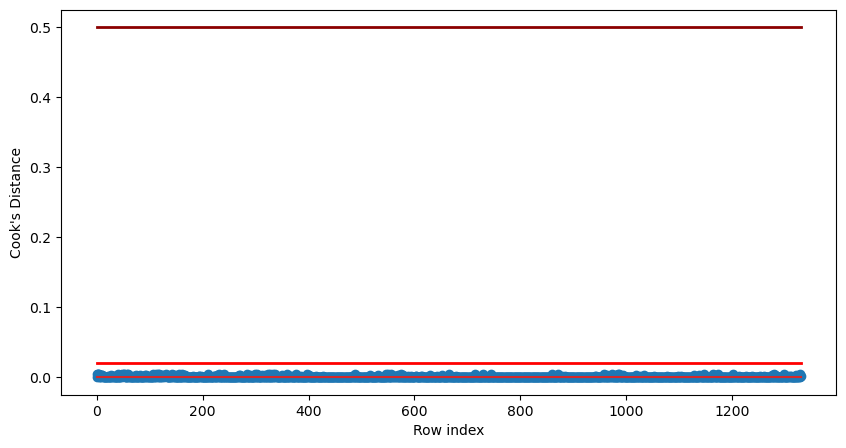

In [63]:
fig = plt.figure(figsize = (10,5))
x = [0,1330]
y = [0.5,0.5]
plt.plot(x, y,color='darkred', linewidth=2)
y1 = [0.02,0.02]
plt.plot(x , y1, color = 'red', linewidth = 2)
plt.stem(np.arange(len(dataframe)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel("Cook's Distance")
plt.show()

In [64]:
print('R-squared     :',final_model.rsquared.round(3))
print('Adj.R-squared :',final_model.rsquared_adj.round(3))
print('AIC Value     :',final_model.aic.round(3))
print('BIC Value     :',final_model.bic.round(3))
print('P-Value       :\n',final_model.pvalues)

R-squared     : 0.9
Adj.R-squared : 0.9
AIC Value     : 22093.158
BIC Value     : 22139.894
P-Value       :
 Intercept     4.470855e-33
Age          2.572702e-304
KM            3.880344e-46
HP            9.826244e-03
CC            1.258063e-14
Doors         4.630408e-06
Gears         1.244643e-01
QT            1.495088e-12
Weight       1.864246e-117
dtype: float64


In [65]:
np.sqrt(final_model.mse_resid)

975.92713992628

In [66]:
log_scaled = pd.DataFrame()
log_scaled['Age'] = np.log(dataframe.Age)
log_scaled['Price'] = np.log(dataframe.Price)
log_scaled['KM'] = np.log(dataframe.KM)
log_scaled['Weight'] = np.log(dataframe.Weight)
log_scaled['CC'] = dataframe['CC']
log_scaled['Doors'] = dataframe['Doors']
log_scaled['HP'] = dataframe['HP']
log_scaled.head()

,Age,Price,KM,Weight,CC,Doors,HP
0,3.135494,9.528794,11.197351,7.060476,2000,3,90
1,3.258097,9.612467,10.778956,7.060476,2000,3,90
2,3.401197,9.528794,10.558414,7.064759,2000,3,90
3,3.465736,9.468851,11.018629,7.064759,2000,3,90
4,3.295837,9.735069,11.457540,7.126891,2000,3,90


In [67]:

log_transformed_model = smf.ols("Price ~ Age + KM + HP + CC + Doors + Weight", data = log_scaled).fit()
# Finding rsquared values for Log transformation
print('R-squared     :',log_transformed_model.rsquared.round(3))
print('Adj.R-squared :',log_transformed_model.rsquared_adj.round(3))
print('AIC Value     :',log_transformed_model.aic.round(3))
print('BIC Value     :',log_transformed_model.bic.round(3))
print('P-Value       :\n',log_transformed_model.pvalues)

R-squared     : 0.768
Adj.R-squared : 0.767
AIC Value     : -1672.015
BIC Value     : -1635.664
P-Value       :
 Intercept     6.946800e-05
Age          7.791624e-156
KM            5.524226e-01
HP            2.046305e-27
CC            5.277651e-17
Doors         3.538899e-01
Weight        6.117389e-31
dtype: float64


In [68]:
cbrt_scaled = pd.DataFrame()
cbrt_scaled['Age'] = np.cbrt(dataframe.Age)
cbrt_scaled['Price'] = np.cbrt(dataframe.Price)
cbrt_scaled['KM'] = np.cbrt(dataframe.KM)
cbrt_scaled['Weight'] = np.cbrt(dataframe.Weight)
cbrt_scaled['CC'] = dataframe['CC']
cbrt_scaled['QT'] = dataframe['QT']
cbrt_scaled['Doors'] = dataframe['Doors']
cbrt_scaled['Gears'] = dataframe['Gears']
cbrt_scaled['HP'] = dataframe['HP']
cbrt_scaled.head()

,Age,Price,KM,Weight,CC,QT,Doors,Gears,HP
0,2.843867,23.957099,41.781366,10.522251,2000,210,3,5,90
1,2.962496,24.634688,36.342412,10.522251,2000,210,3,5,90
2,3.107233,23.957099,33.766567,10.537282,2000,210,3,5,90
3,3.174802,23.483163,39.364972,10.537282,2000,210,3,5,90
4,3.000000,25.662299,45.566822,10.757791,2000,210,3,5,90


In [69]:
cbrt_transformed_model = smf.ols("Price ~ Age + KM + HP + CC + Doors + Gears + QT + Weight", data = cbrt_scaled).fit()
# Finding rsquared values for Cube-Root transformation
print('R-squared     :',cbrt_transformed_model.rsquared.round(3))
print('Adj.R-squared :',cbrt_transformed_model.rsquared_adj.round(3))
print('AIC Value     :',cbrt_transformed_model.aic.round(3))
print('BIC Value     :',cbrt_transformed_model.bic.round(3))
print('P-Value       :\n',cbrt_transformed_model.pvalues)

R-squared     : 0.857
Adj.R-squared : 0.856
AIC Value     : 3029.59
BIC Value     : 3076.326
P-Value       :
 Intercept     6.639157e-07
Age          1.393540e-208
KM            2.087164e-28
HP            2.139734e-09
CC            1.564446e-08
Doors         4.795731e-01
Gears         1.890110e-02
QT            2.182072e-01
Weight        3.021772e-38
dtype: float64


In [70]:
sqrt_scaled = pd.DataFrame()
sqrt_scaled['Age'] = np.sqrt(dataframe.Age)
sqrt_scaled['Price'] = np.sqrt(dataframe.Price)
sqrt_scaled['KM'] = np.sqrt(dataframe.KM)
sqrt_scaled['Weight'] = np.sqrt(dataframe.Weight)
sqrt_scaled['CC'] = dataframe['CC']
sqrt_scaled['QT'] = dataframe['QT']
sqrt_scaled['Doors'] = dataframe['Doors']
sqrt_scaled['Gears'] = dataframe['Gears']
sqrt_scaled['HP'] = dataframe['HP']
sqrt_scaled.head()

,Age,Price,KM,Weight,CC,QT,Doors,Gears,HP
0,4.795832,117.260394,270.068510,34.132096,2000,210,3,5,90
1,5.099020,122.270193,219.089023,34.132096,2000,210,3,5,90
2,5.477226,117.260394,196.214169,34.205263,2000,210,3,5,90
3,5.656854,113.798067,246.981781,34.205263,2000,210,3,5,90
4,5.196152,130.000000,307.590637,35.284558,2000,210,3,5,90


In [71]:
sqrt_transformed_model = smf.ols("Price ~ Age + KM + HP + CC + Doors + Gears + QT + Weight", data = sqrt_scaled).fit()
# Finding rsquared values for Square-Root transformation
print('R-squared     :',sqrt_transformed_model.rsquared.round(3))
print('Adj.R-squared :',sqrt_transformed_model.rsquared_adj.round(3))
print('AIC Value     :',sqrt_transformed_model.aic.round(3))
print('BIC Value     :',sqrt_transformed_model.bic.round(3))
print('P-Value       :\n',sqrt_transformed_model.pvalues)

R-squared     : 0.882
Adj.R-squared : 0.881
AIC Value     : 8003.97
BIC Value     : 8050.706
P-Value       :
 Intercept     1.523304e-10
Age          9.091458e-252
KM            1.408312e-40
HP            4.227817e-07
CC            2.296425e-08
Doors         2.109815e-01
Gears         1.323992e-02
QT            1.047318e-02
Weight        4.458109e-52
dtype: float64


In [72]:
robust_scaled = dataframe.copy()
columns= ['Price','Age','KM','Weight']
features = robust_scaled[columns]

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

robust_scaled[columns] = scaler.fit_transform(features.values)
robust_scaled.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,1.175000,-1.583333,0.211503,90,2000,3,5,210,2.222222
1,1.538636,-1.458333,-0.375961,90,2000,3,5,210,2.222222
2,1.175000,-1.291667,-0.599762,90,2000,3,5,210,2.333333
3,0.932576,-1.208333,-0.069708,90,2000,3,5,210,2.333333
4,2.129545,-1.416667,0.722122,90,2000,3,5,210,4.000000


In [73]:
robust_transformed_model = smf.ols("Price ~ Age + KM + HP + CC + Doors + Gears + QT + Weight", data = robust_scaled).fit()
# Finding rsquared values for robust transformation
print('R-squared     :',robust_transformed_model.rsquared.round(3))
print('Adj.R-squared :',robust_transformed_model.rsquared_adj.round(3))
print('AIC Value     :',robust_transformed_model.aic.round(3))
print('BIC Value     :',robust_transformed_model.bic.round(3))
print('P-Value       :\n',robust_transformed_model.pvalues)

R-squared     : 0.9
Adj.R-squared : 0.9
AIC Value     : 542.695
BIC Value     : 589.431
P-Value       :
 Intercept     5.040714e-04
Age          2.572702e-304
KM            3.880344e-46
HP            9.826244e-03
CC            1.258063e-14
Doors         4.630408e-06
Gears         1.244643e-01
QT            1.495088e-12
Weight       1.864246e-117
dtype: float64


In [74]:
from sklearn.preprocessing import StandardScaler

col_names = dataframe.columns
features = dataframe[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
standard_scaled = pd.DataFrame(features, columns = col_names)
standard_scaled.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,1.057454,-1.915503,0.136289,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.456469
1,1.446875,-1.746462,-0.576515,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.456469
2,1.057454,-1.521074,-0.848065,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.580538
3,0.797839,-1.408380,-0.204921,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.580538
4,2.079684,-1.690115,0.755851,-0.883769,2.526466,-1.067888,-0.137393,3.424789,4.441570


In [75]:
standard_scaler_transformed_model = smf.ols("Price ~ Age + KM + HP + CC + Doors + Gears + QT + Weight", data = standard_scaled).fit()
# Finding rsquared values for standard scaler transformation
print('R-squared     :',standard_scaler_transformed_model.rsquared.round(3))
print('Adj.R-squared :',standard_scaler_transformed_model.rsquared_adj.round(3))
print('AIC Value     :',standard_scaler_transformed_model.aic.round(3))
print('BIC Value     :',standard_scaler_transformed_model.bic.round(3))
print('P-Value       :\n',standard_scaler_transformed_model.pvalues)

R-squared     : 0.9
Adj.R-squared : 0.9
AIC Value     : 724.925
BIC Value     : 771.661
P-Value       :
 Intercept     1.000000e+00
Age          2.572702e-304
KM            3.880344e-46
HP            9.826244e-03
CC            1.258063e-14
Doors         4.630408e-06
Gears         1.244643e-01
QT            1.495088e-12
Weight       1.864246e-117
dtype: float64


In [76]:
model = smf.ols("Price ~ Age + KM + HP + CC + Doors + Gears + QT + Weight", data = standard_scaled).fit()
print('R-squared     :',model.rsquared.round(3))
print('Adj.R-squared :',model.rsquared_adj.round(3))
print('AIC Value     :',model.aic.round(3))
print('BIC Value     :',model.bic.round(3))
print('P-Value       :\n',model.pvalues)

R-squared     : 0.9
Adj.R-squared : 0.9
AIC Value     : 724.925
BIC Value     : 771.661
P-Value       :
 Intercept     1.000000e+00
Age          2.572702e-304
KM            3.880344e-46
HP            9.826244e-03
CC            1.258063e-14
Doors         4.630408e-06
Gears         1.244643e-01
QT            1.495088e-12
Weight       1.864246e-117
dtype: float64


eval_env: 1


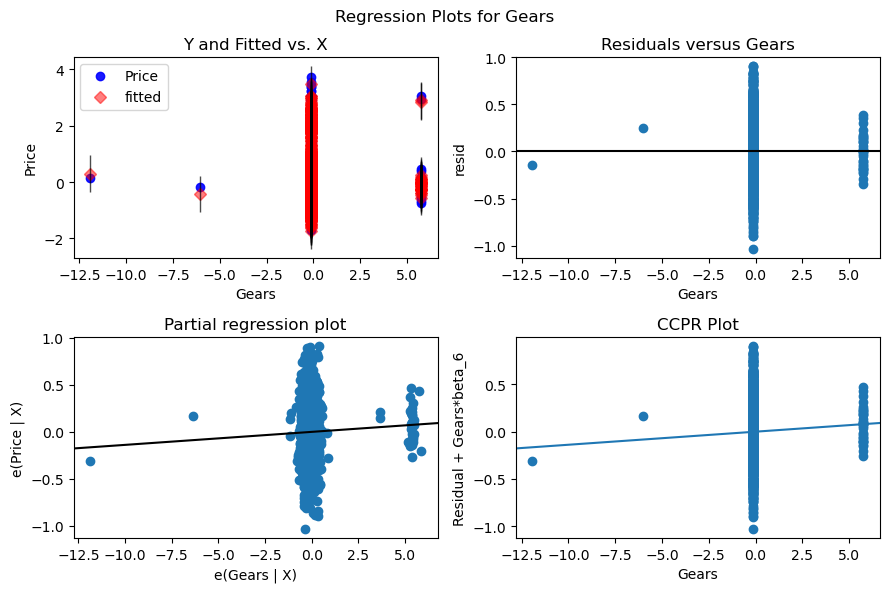

In [77]:
fig = plt.figure(figsize = (9,6))
sm.graphics.plot_regress_exog(model, 'Gears', fig=fig)
plt.show()

In [78]:
y = standard_scaled.drop(['Price'], axis=1)
vif = pd.DataFrame()
vif['Features'] = y.columns
vif['VIF'] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,QT,4.86
7,Weight,4.74
3,CC,3.73
0,Age,2.09
2,HP,2.09
1,KM,1.86
4,Doors,1.34
5,Gears,1.08


In [79]:
r_sqr_age = smf.ols('Age ~ HP+Weight+CC+Doors+QT+Gears+KM', dataframe).fit().rsquared
vif_age = 1/(1-r_sqr_age)
r_sqr_weight = smf.ols('Weight ~ HP+Age+CC+Doors+QT+Gears+KM', dataframe).fit().rsquared
vif_weight = 1/(1-r_sqr_weight)
r_sqr_cc = smf.ols('CC ~ HP+Weight+Age+Doors+QT+Gears+KM', dataframe).fit().rsquared
vif_cc = 1/(1-r_sqr_cc)
r_sqr_hp = smf.ols('HP ~ Age+Weight+CC+Doors+QT+Gears+KM', dataframe).fit().rsquared
vif_hp = 1/(1-r_sqr_hp)
r_sqr_qt = smf.ols('QT ~ HP+Weight+CC+Doors+Age+Gears+KM', dataframe).fit().rsquared
vif_qt = 1/(1-r_sqr_qt)
r_sqr_km = smf.ols('KM ~ HP+Weight+CC+Doors+QT+Gears+Age', dataframe).fit().rsquared
vif_km = 1/(1-r_sqr_km)
r_sqr_gears = smf.ols('Gears ~ HP+Weight+CC+Doors+QT+Age+KM', dataframe).fit().rsquared
vif_gears = 1/(1-r_sqr_gears)
r_sqr_doors = smf.ols('Doors ~ HP+Weight+CC+Age+QT+Gears+KM', dataframe).fit().rsquared
vif_doors = 1/(1-r_sqr_doors)

In [80]:
vif_frame = pd.DataFrame({'Variables':['Doors','HP','Weight','CC','Age','QT','Gears','KM'], 'VIF':[vif_doors,vif_hp,vif_weight,vif_cc,vif_age,vif_qt,vif_gears,vif_km]}, index = None)
vif_frame.set_index('Variables', inplace = True)
vif_frame.sort_values(by = 'VIF')

,VIF
Variables,
Gears,1.075124
Doors,1.336868
KM,1.858592
Age,2.091177
HP,2.094861
CC,3.725960
Weight,4.744228
QT,4.863714


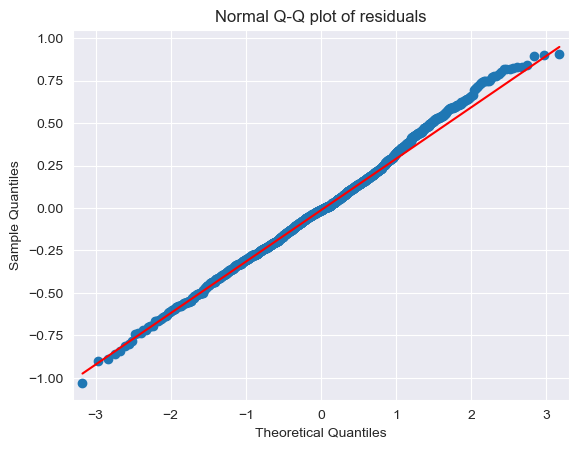

In [81]:
sns.set_style(style = 'darkgrid')
qqplot = sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [82]:
qt_model = smf.ols('Price ~ QT', data= standard_scaled).fit()
print('R-squared     :',qt_model.rsquared.round(3))
print('Adj.R-squared :',qt_model.rsquared_adj.round(3))
print('AIC Value     :',qt_model.aic.round(3))
print('BIC Value     :',qt_model.bic.round(3))
print('P-Value       :\n',qt_model.pvalues)

R-squared     : 0.018
Adj.R-squared : 0.017
AIC Value     : 3754.038
BIC Value     : 3764.424
P-Value       :
 Intercept    1.000000e+00
QT           8.274483e-07
dtype: float64


In [83]:
gears_model = smf.ols('Price ~ Gears', data= standard_scaled).fit()
print('R-squared     :',gears_model.rsquared.round(3))
print('Adj.R-squared :',gears_model.rsquared_adj.round(3))
print('AIC Value     :',gears_model.aic.round(3))
print('BIC Value     :',gears_model.bic.round(3))
print('P-Value       :\n',gears_model.pvalues)

R-squared     : 0.0
Adj.R-squared : -0.001
AIC Value     : 3778.293
BIC Value     : 3788.679
P-Value       :
 Intercept    1.000000
Gears        0.773189
dtype: float64


In [84]:
gears_qt_model = smf.ols('Price ~ Gears+QT', data= standard_scaled).fit()
print('R-squared     :',gears_qt_model.rsquared.round(3))
print('Adj.R-squared :',gears_qt_model.rsquared_adj.round(3))
print('AIC Value     :',gears_qt_model.aic.round(3))
print('BIC Value     :',gears_qt_model.bic.round(3))
print('P-Value       :\n',gears_qt_model.pvalues)

R-squared     : 0.018
Adj.R-squared : 0.017
AIC Value     : 3755.939
BIC Value     : 3771.518
P-Value       :
 Intercept    1.000000e+00
Gears        7.539756e-01
QT           8.287722e-07
dtype: float64


In [85]:
x1 = standard_scaled.drop(['Gears'], axis=1)
y1 = standard_scaled.drop(['Gears','Price'], axis=1)

In [86]:
x1.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'QT', 'Weight'], dtype='object')

In [87]:
model_1 = smf.ols('Price ~ Age+KM+HP+CC+Doors+QT+Weight', data = x1).fit()
print('R-squared     :',model_1.rsquared.round(3))
print('Adj.R-squared :',model_1.rsquared_adj.round(3))
print('AIC Value     :',model_1.aic.round(3))
print('BIC Value     :',model_1.bic.round(3))
print('P-Value       :\n',model_1.pvalues)

R-squared     : 0.9
Adj.R-squared : 0.9
AIC Value     : 725.302
BIC Value     : 766.845
P-Value       :
 Intercept     1.000000e+00
Age          4.102879e-304
KM            1.061882e-45
HP            3.613164e-03
CC            3.825101e-15
Doors         6.003742e-07
QT            2.732049e-12
Weight       3.836906e-118
dtype: float64


In [88]:
toyota_corolla.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


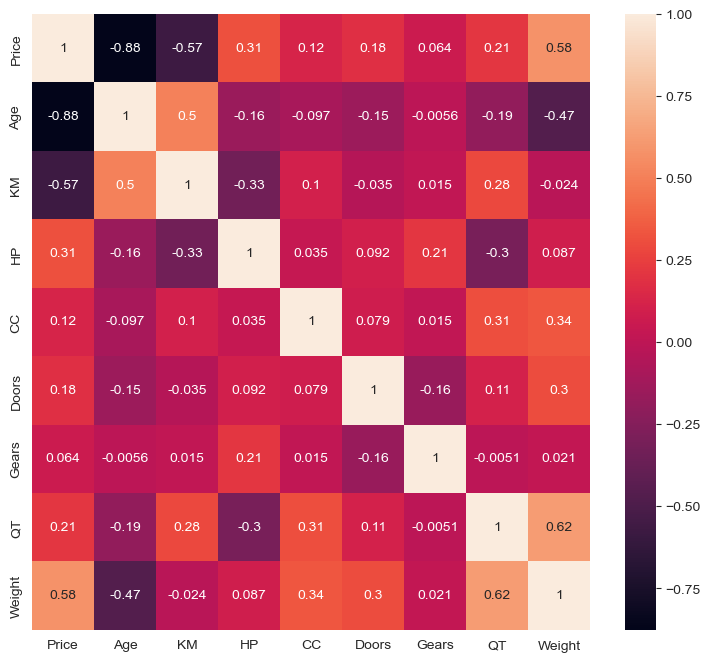

In [89]:
plt.figure(figsize=(9,8))
sns.heatmap(toyota_corolla.corr(),annot=True)
plt.show()

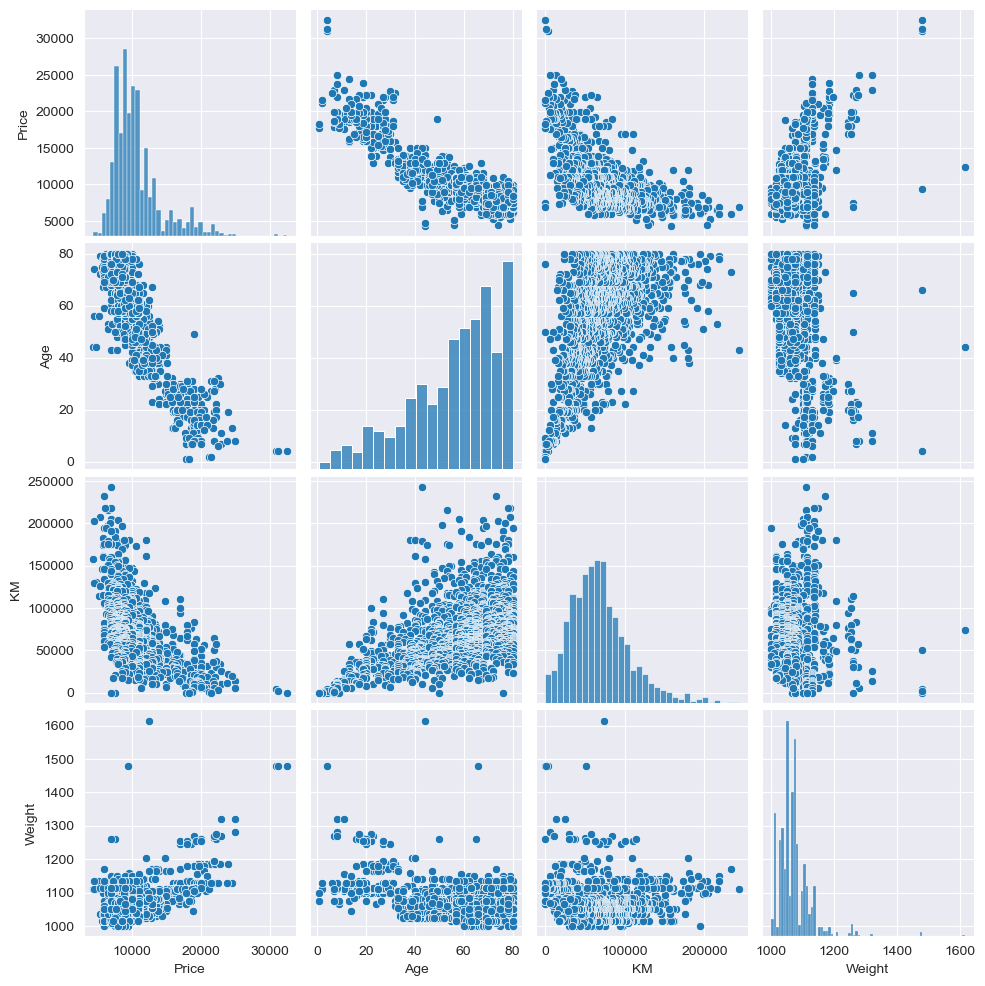

In [90]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota_corolla[continuous_feature])
plt.show()

In [91]:
standard_scaled.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,1.057454,-1.915503,0.136289,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.456469
1,1.446875,-1.746462,-0.576515,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.456469
2,1.057454,-1.521074,-0.848065,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.580538
3,0.797839,-1.408380,-0.204921,-0.883769,2.526466,-1.067888,-0.137393,3.424789,2.580538
4,2.079684,-1.690115,0.755851,-0.883769,2.526466,-1.067888,-0.137393,3.424789,4.441570


In [92]:
array = standard_scaled.values
x = array[:,1:]
y = array[:,1]

In [93]:
pca_var = PCA()
pca_var.fit(x)

PCA()

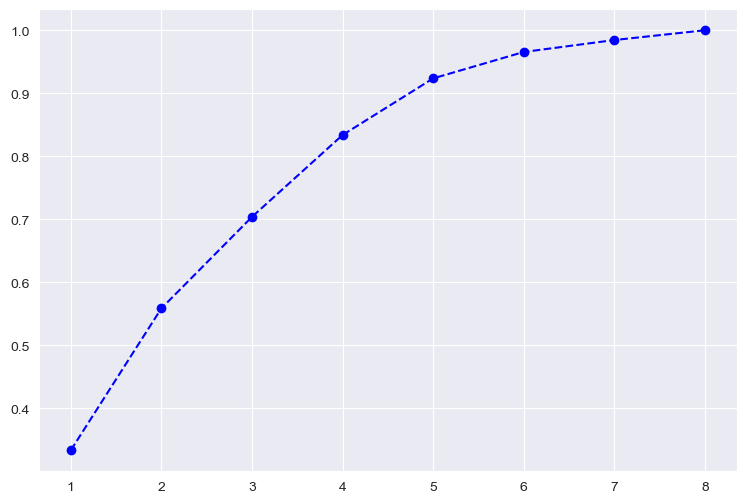

In [94]:
plt.figure(figsize=(9,6))
xi = np.arange(1, 1+x.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')
plt.show()

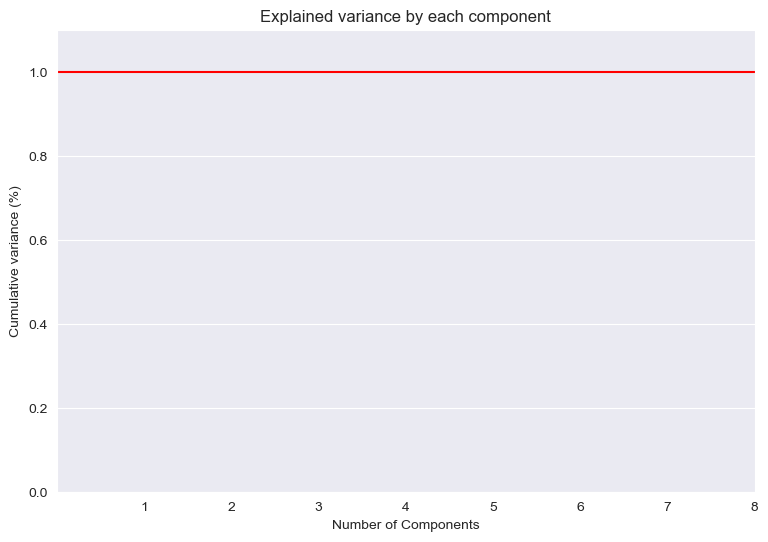

In [95]:
plt.figure(figsize=(9,6))
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+x.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [96]:
var = pca_var.explained_variance_ratio_
var 

array([0.33354904, 0.22519775, 0.1451224 , 0.12991156, 0.08985917,
       0.04191581, 0.01895074, 0.01549353])

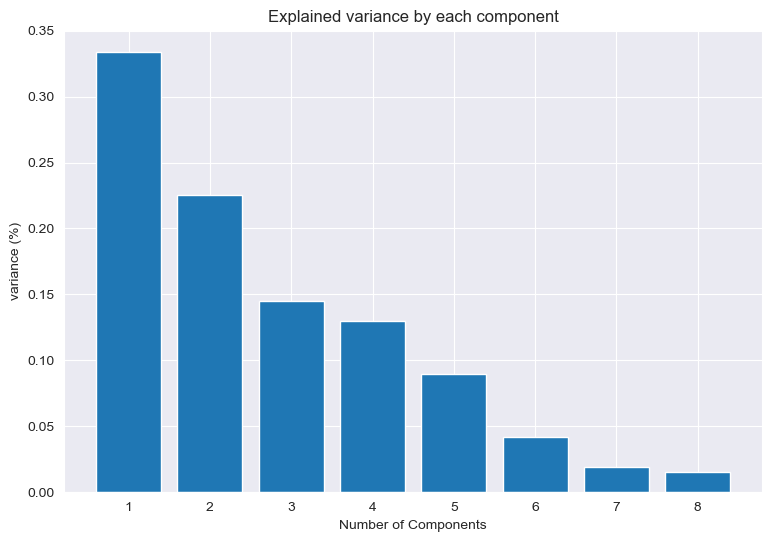

In [97]:
plt.figure(figsize=(9,6))
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')
plt.show()

In [98]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 33.35,  55.87,  70.38,  83.37,  92.36,  96.55,  98.45, 100.  ])

In [99]:
pca = PCA()
pca_std = pca.fit_transform(x)

In [100]:
pca_std_df = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3','PC4', 'PC5','PC6','PC7','PC8'])

In [101]:
print(pca_std_df.shape)
pca_std_df.head()

(1330, 8)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,4.829707,0.064931,-0.190264,-2.190636,1.159079,0.025216,-0.015311,-0.514560
1,4.679884,0.404151,-0.150193,-2.314266,1.205529,-0.589953,-0.009888,-0.474104
2,4.660639,0.468144,-0.154145,-2.295954,1.226273,-0.921497,0.114514,-0.377730
3,4.744045,0.012750,-0.214820,-2.074836,1.192697,-0.529197,0.180736,-0.380472
4,5.995403,-0.033057,-0.328856,-1.946975,1.098213,0.357084,1.346511,0.465162


In [102]:
dataframe.Price

0       13750
1       14950
2       13750
3       12950
4       16900
        ...  
1325     8450
1326     7500
1327    10845
1328     8500
1329     7250
Name: Price, Length: 1330, dtype: int64

In [103]:
pca_std_df['Price'] = y
pca_std_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Price
0,4.829707,0.064931,-0.190264,-2.190636,1.159079,0.025216,-0.015311,-0.514560,-1.915503
1,4.679884,0.404151,-0.150193,-2.314266,1.205529,-0.589953,-0.009888,-0.474104,-1.746462
2,4.660639,0.468144,-0.154145,-2.295954,1.226273,-0.921497,0.114514,-0.377730,-1.521074
3,4.744045,0.012750,-0.214820,-2.074836,1.192697,-0.529197,0.180736,-0.380472,-1.408380
4,5.995403,-0.033057,-0.328856,-1.946975,1.098213,0.357084,1.346511,0.465162,-1.690115


In [104]:
import statsmodels.formula.api as sm
pca_model = sm.ols('Price ~ PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8', data= pca_std_df).fit()
print('R-squared     :',pca_model.rsquared.round(3))
print('Adj.R-squared :',pca_model.rsquared_adj.round(3))
print('AIC Value     :',pca_model.aic.round(3))
print('BIC Value     :',pca_model.bic.round(3))

R-squared     : 1.0
Adj.R-squared : 1.0
AIC Value     : -88515.704
BIC Value     : -88468.968


In [105]:
transformer_y = StandardScaler().fit(dataframe['Price'].to_numpy().reshape(-1,1))
# Scale the test dataset
y_train_scal = transformer_y.transform(dataframe['Price'].to_numpy().reshape(-1,1))

# Predict with the trained model
predict = pd.DataFrame(pca_model.predict(pca_std_df))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(dataframe.Price, predict_unscaled)))
print("R2_score          : ", pca_model.rsquared)
print("R2_Adjusted_score : ", pca_model.rsquared_adj)
print("RMSE              : ", rmse_linear)

R2_score          :  1.0
R2_Adjusted_score :  1.0
RMSE              :  6012.9848666563785


In [106]:
pca_std_df['Price'] = dataframe['Price']
pca_std_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Price
0,4.829707,0.064931,-0.190264,-2.190636,1.159079,0.025216,-0.015311,-0.514560,13750
1,4.679884,0.404151,-0.150193,-2.314266,1.205529,-0.589953,-0.009888,-0.474104,14950
2,4.660639,0.468144,-0.154145,-2.295954,1.226273,-0.921497,0.114514,-0.377730,13750
3,4.744045,0.012750,-0.214820,-2.074836,1.192697,-0.529197,0.180736,-0.380472,12950
4,5.995403,-0.033057,-0.328856,-1.946975,1.098213,0.357084,1.346511,0.465162,16900


In [107]:
x_train, x_test, y_train, y_test = train_test_split(pca_std_df.iloc[:,:-1], pca_std_df.iloc[:,-1],test_size=0.3,random_state=10)
print("Shape of X_train : ",x_train.shape)
print("Shape of X_test  : ", x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of X_train :  (931, 8)
Shape of X_test  :  (399, 8)
Shape of y_train :  (931,)
Shape of y_test  :  (399,)


In [108]:
transformer_x = StandardScaler().fit(x_train.to_numpy().reshape(-1,1))
transformer_y = StandardScaler().fit(y_train.to_numpy().reshape(-1,1)) 
x_train_scal = transformer_x.transform(y_train.to_numpy().reshape(-1,1))
x_test_scal = transformer_x.transform(y_test.to_numpy().reshape(-1,1))
y_train_scal = transformer_y.transform(y_train.to_numpy().reshape(-1,1))
y_test_scal = transformer_y.transform(y_test.to_numpy().reshape(-1,1))

In [109]:
regressor_linear = LinearRegression()
regressor_linear.fit(x_train, y_train_scal)

LinearRegression()

In [110]:
lin_reg_model = LinearRegression().fit(x_train, y_train)
print(lin_reg_model.score(x_train, y_train),lin_reg_model.score(x_test, y_test))

0.8988158478302263 0.9029088431252972


In [111]:
# Predict with the trained model
prediction = regressor_linear.predict(x_test)

# Inverse transform the prediction
prediction_unscaled = transformer_y.inverse_transform(prediction)

from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = x_train, y = y_train_scal, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(x_train)
r2_score_all_feature_train = r2_score(y_train_scal, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(x_test)
r2_score_all_feature_test = r2_score(y_test_scal, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear_using_all_features = (np.sqrt(mean_squared_error(y_test, prediction_unscaled)))
print("CV                      : ", cv_linear.mean())
print("R2_score (train)        : ", r2_score_all_feature_train)
print("R2_score (test)         : ", r2_score_all_feature_test)
print("RMSE using all features : ", rmse_linear_using_all_features)

CV                      :  0.89557987689744
R2_score (train)        :  0.8988158478302263
R2_score (test)         :  0.9029088431252972
RMSE using all features :  967.5710122616746


In [112]:
x2 = dataframe[['Age','KM','HP','CC','Doors','QT','Weight']]
y2 = dataframe[['Price']]
transformer_x = StandardScaler().fit(x2)
transformer_y = StandardScaler().fit(y2)
# Scale the test dataset
x_train_scal = transformer_x.transform(x2)
y_train_scal = transformer_y.transform(y2)

# Linear Regression
x_df = pd.DataFrame(x_train_scal, columns = ['Age','KM','HP','CC','Doors','QT','Weight'])
x_df.head()

# Predict with the trained model
predict = pd.DataFrame(model_1.predict(x_df))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))

# Predicting RMSE the Test set results
rmse_linear= (np.sqrt(mean_squared_error(y2, predict_unscaled)))
print('R2_score          : ', model_1.rsquared)
print('R2_Adjusted_score : ', model_1.rsquared_adj)
print("RMSE              : ", rmse_linear)

R2_score          :  0.9001980293966753
R2_Adjusted_score :  0.8996695772073989
RMSE              :  973.4891302577998


In [113]:
square_root_pred_y =np.square(sqrt_transformed_model.predict(sqrt_scaled[['Age','Weight','KM','HP','CC','QT','Doors','Gears']]))
cube_root_pred_y =pow(cbrt_transformed_model.predict(cbrt_scaled[['Age','Weight','KM','HP','CC','QT','Doors','Gears']]),3)
log_model_pred_y =np.exp(log_transformed_model.predict(log_scaled[['Age','Weight','KM','HP','CC','Doors']]))

In [114]:
square_root_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], square_root_pred_y))
cube_root_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], cube_root_pred_y))
log_both_rmse =np.sqrt(mean_squared_error(dataframe['Price'], log_model_pred_y))

In [115]:
print    ('Raw Model                                     :', np.sqrt(raw_data_model.mse_resid),
      '\n''After Removing Influencers                    :', np.sqrt(final_model.mse_resid),
      '\n''After Log Transformation on both Model        :', log_both_rmse,
      '\n''After Cube-root Transformation on both Model  :', cube_root_both_rmse,
      '\n''After Sqaure Root Transformation on both Model:', square_root_both_rmse,
      '\n''After Removing Influencers from model         :', np.sqrt(final_model.mse_resid),
      '\n''Final Model without Multicollinearity Model   :', rmse_linear)

Raw Model                                     : 976.7658733249548 
After Removing Influencers                    : 975.92713992628 
After Log Transformation on both Model        : 1795.826559210351 
After Cube-root Transformation on both Model  : 1152.5577948742653 
After Sqaure Root Transformation on both Model: 1010.8979447569396 
After Removing Influencers from model         : 975.92713992628 
Final Model without Multicollinearity Model   : 973.4891302577998


In [116]:
rmse_compare = {'Raw Model': np.sqrt(raw_data_model.mse_resid),
                'After Removing Influencers': np.sqrt(final_model.mse_resid),
                'After Log Transformation Model': log_both_rmse,
                'After Cube-root Transformation Model': cube_root_both_rmse,
                'After Sqaure Root Transformation Model': square_root_both_rmse,
                'After Removing Influencers from model': np.sqrt(final_model.mse_resid),
                'Final Model without Multicollinearity Model': rmse_linear}
min(rmse_compare, key=rmse_compare.get)

'Final Model without Multicollinearity Model'

In [117]:
x1.columns

Index(['Price', 'Age', 'KM', 'HP', 'CC', 'Doors', 'QT', 'Weight'], dtype='object')

In [118]:
final_model = smf.ols("Price ~ Age+KM+HP+CC+Doors+QT+Weight", data = x1).fit()
# Finding rsquared values
print('R-squared     :',final_model.rsquared.round(3))
print('Adj.R-squared :',final_model.rsquared_adj.round(3))
print('AIC Value     :',final_model.aic.round(3))
print('BIC Value     :',final_model.bic.round(3))

R-squared     : 0.9
Adj.R-squared : 0.9
AIC Value     : 725.302
BIC Value     : 766.845


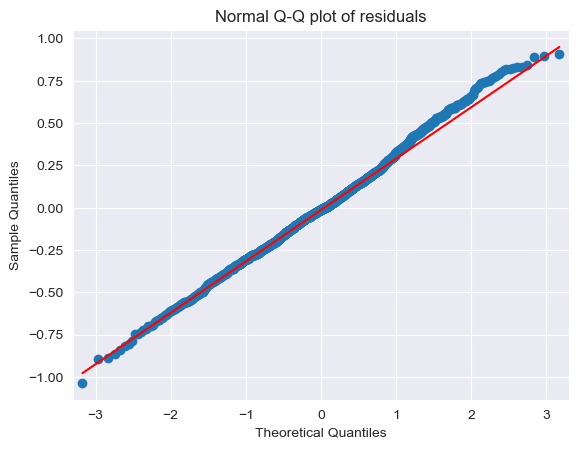

In [119]:
import statsmodels.api as sm
sm.qqplot(final_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [120]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

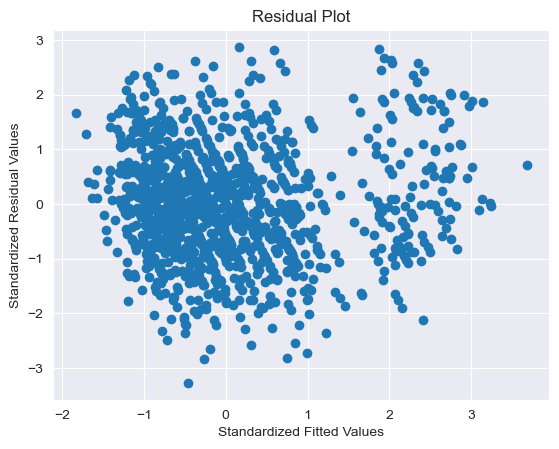

In [121]:
plt.scatter(get_standardized_values(final_model.fittedvalues), get_standardized_values(final_model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

eval_env: 1


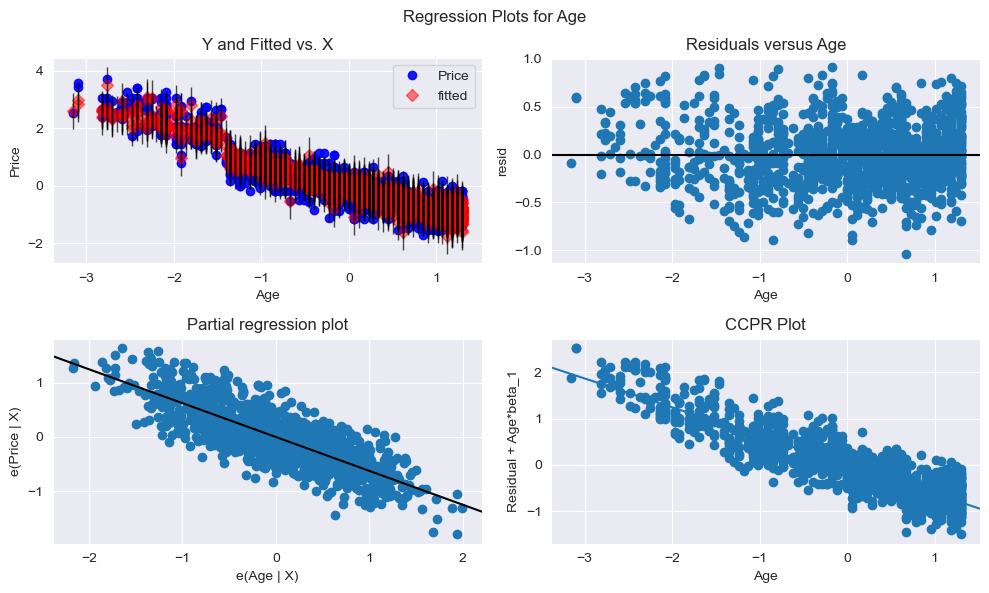

In [122]:
fig = plt.figure(figsize = (10,6))
sm.graphics.plot_regress_exog(final_model, 'Age', fig=fig)
plt.show()

eval_env: 1


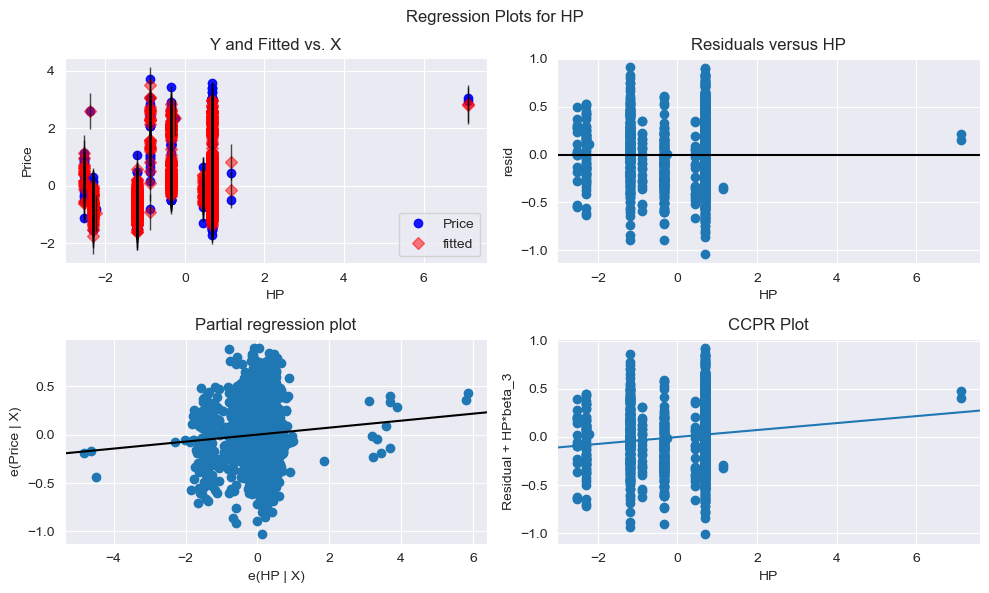

In [123]:
fig = plt.figure(figsize = (10,6))
sm.graphics.plot_regress_exog(final_model, 'HP', fig=fig)
plt.show()

eval_env: 1


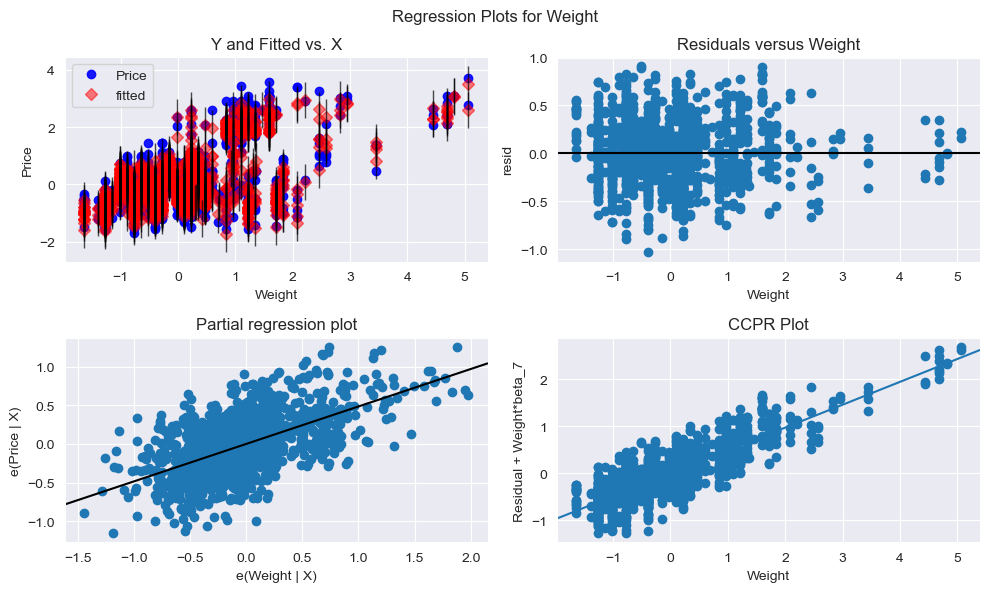

In [124]:
fig = plt.figure(figsize = (10,6))
sm.graphics.plot_regress_exog(final_model, 'Weight', fig=fig)
plt.show()

eval_env: 1


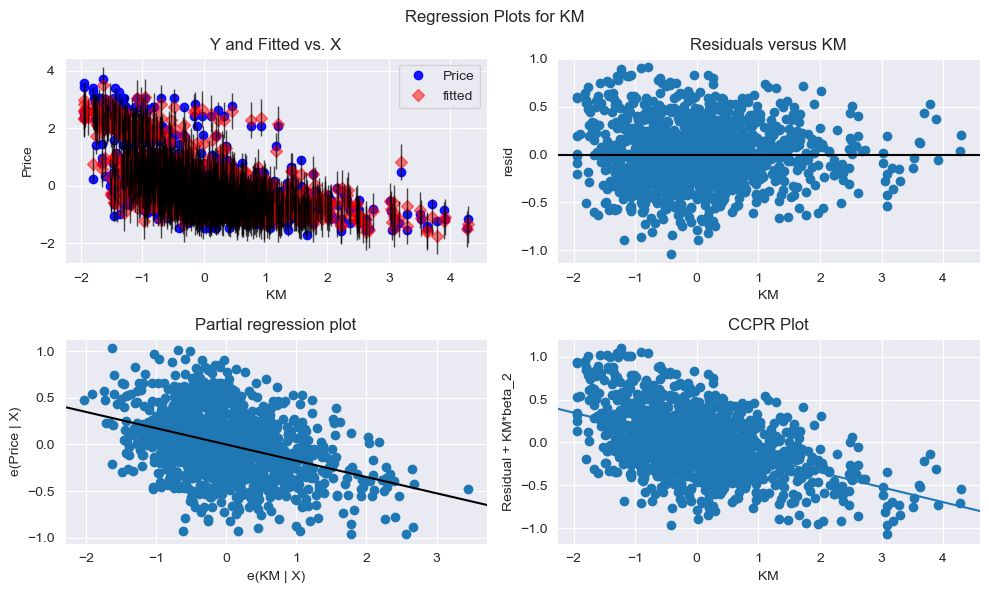

In [125]:
fig = plt.figure(figsize = (10,6))
sm.graphics.plot_regress_exog(final_model, 'KM', fig=fig)
plt.show()

eval_env: 1


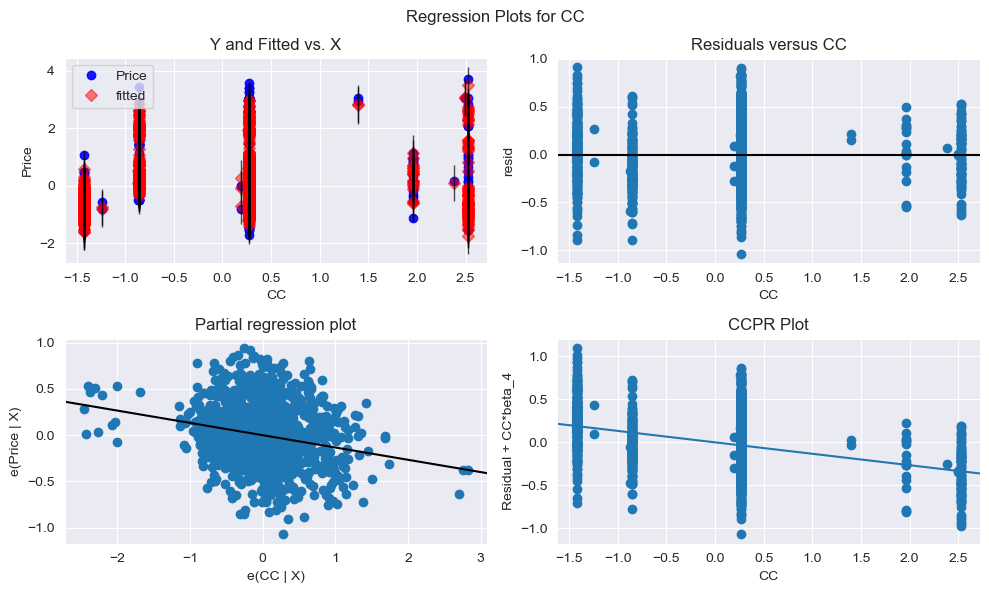

In [126]:
fig = plt.figure(figsize = (10,6))
sm.graphics.plot_regress_exog(final_model, 'CC', fig=fig)
plt.show()

eval_env: 1


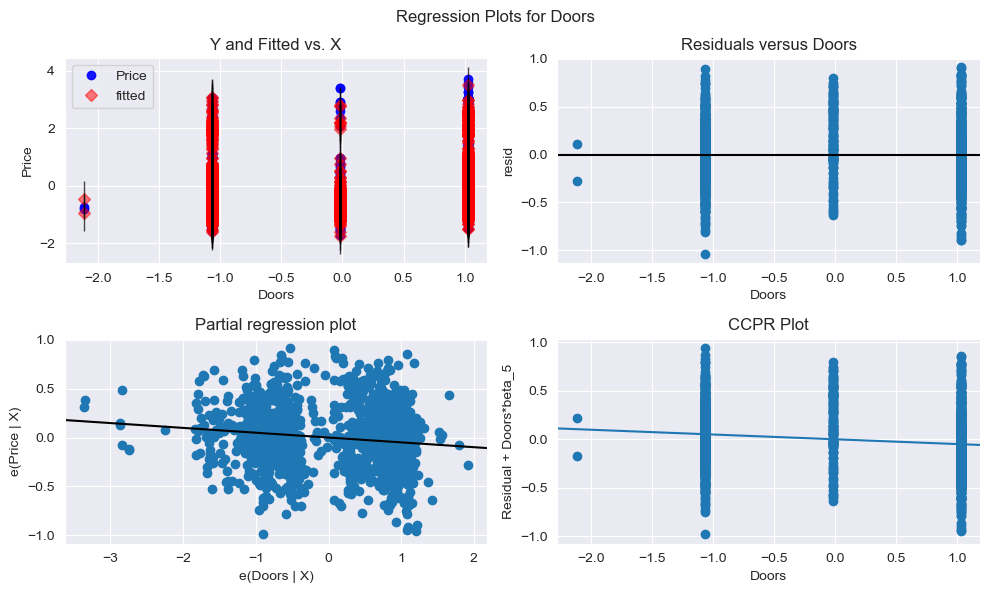

In [127]:
fig = plt.figure(figsize = (10,6))
sm.graphics.plot_regress_exog(final_model, 'Doors', fig=fig)
plt.show()

In [128]:
x = dataframe[['Age','KM','HP','CC','Doors','QT','Weight']]
y = dataframe[['Price']]
transformer_x = StandardScaler().fit(x)
transformer_y = StandardScaler().fit(y)
# Scale the test dataset
x_train_scal = transformer_x.transform(x)
y_train_scal = transformer_y.transform(y)

# Linear Regression
x_df = pd.DataFrame(x_train_scal, columns = ['Age','KM','HP','CC','Doors','QT','Weight'])
x_df.head()

# Predict with the trained model
predict = pd.DataFrame(final_model.predict(x_df))

# Inverse transform the prediction
predict_unscaled = transformer_y.inverse_transform(predict.values.reshape(-1,1))
predict_unscaled

array([[15373.39486456],
       [15431.54051364],
       [15329.9011379 ],
       ...,
       [ 8534.98068775],
       [ 8673.66142795],
       [ 8783.42022356]])

In [129]:
(np.sqrt(mean_squared_error(y, predict_unscaled)))

973.4891302577998

In [130]:
predicted = pd.DataFrame(predict_unscaled,columns=['Predicted_Price'])
predicted['Price'] = dataframe.Price
predicted['Age'] = dataframe.Age
predicted['KM'] = dataframe.KM
predicted['Weight'] = dataframe.Weight
predicted['HP'] = dataframe.HP
predicted['CC'] = dataframe.CC
predicted['QT'] = dataframe.QT
predicted['Doors'] = dataframe.Doors
predicted

,Predicted_Price,Price,Age,KM,Weight,HP,CC,QT,Doors
0,15373.394865,13750,23,72937,1165,90,2000,210,3
1,15431.540514,14950,26,48000,1165,90,2000,210,3
2,15329.901138,13750,30,38500,1170,90,2000,210,3
3,14768.048428,12950,32,61000,1170,90,2000,210,3
4,17574.438664,16900,27,94612,1245,90,2000,210,3
...,...,...,...,...,...,...,...,...,...
1325,7607.786001,8450,80,23000,1015,86,1300,69,3
1326,9206.784055,7500,69,20544,1025,86,1300,69,3
1327,8534.980688,10845,72,19000,1015,86,1300,69,3
1328,8673.661428,8500,71,17016,1015,86,1300,69,3


In [131]:
models={'Different_Models':['Raw_Data_Model','After_Removing_Outlier_Model','After_Log Transformation_Model','After_Cube-Root_Transformation_Model','After_Sqaure_Root_Transformation_Model','Final_Model_Without_Multicollinearity_Model'],
        'R_squared':[raw_data_model.rsquared,final_model.rsquared,log_transformed_model.rsquared,cbrt_transformed_model.rsquared,sqrt_transformed_model.rsquared,model_1.rsquared],
        'R_squared_adjusted':[raw_data_model.rsquared_adj,final_model.rsquared_adj,log_transformed_model.rsquared_adj,cbrt_transformed_model.rsquared_adj,sqrt_transformed_model.rsquared_adj,model_1.rsquared_adj],
        'RMSE':[np.sqrt(raw_data_model.mse_resid),np.sqrt(final_model.mse_resid),log_both_rmse,cube_root_both_rmse,square_root_both_rmse,rmse_linear]}
model_table = pd.DataFrame(models)
model_table

,Different_Models,R_squared,R_squared_adjusted,RMSE
0,Raw_Data_Model,0.900224,0.899620,976.765873
1,After_Removing_Outlier_Model,0.900198,0.899670,0.316869
2,After_Log Transformation_Model,0.767907,0.766855,1795.826559
3,After_Cube-Root_Transformation_Model,0.857248,0.856384,1152.557795
4,After_Sqaure_Root_Transformation_Model,0.881555,0.880837,1010.897945
5,Final_Model_Without_Multicollinearity_Model,0.900198,0.899670,973.489130


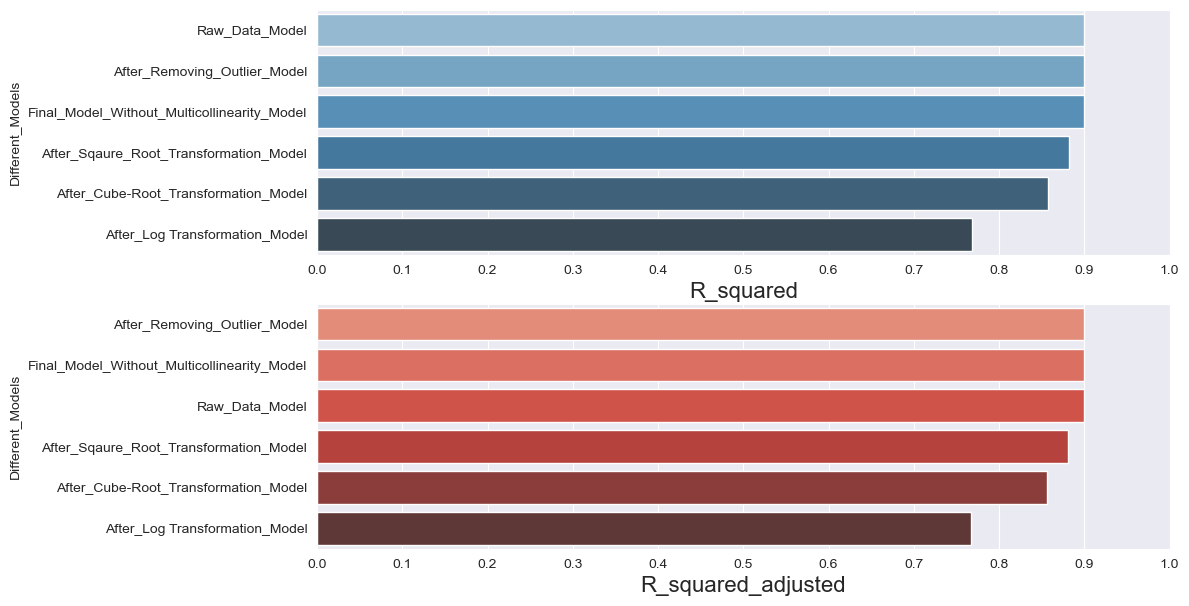

In [132]:
f, axes = plt.subplots(2,1, figsize=(11,7))

model_table.sort_values(by=['R_squared'], ascending=False, inplace=True)

sns.barplot(x='R_squared', y='Different_Models', data = model_table, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('R_squared', size=16)
axes[0].set_ylabel('Different_Models')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

model_table.sort_values(by=['R_squared_adjusted'], ascending=False, inplace=True)

sns.barplot(x='R_squared_adjusted', y='Different_Models', data = model_table, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('R_squared_adjusted', size=16)
axes[1].set_ylabel('Different_Models')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

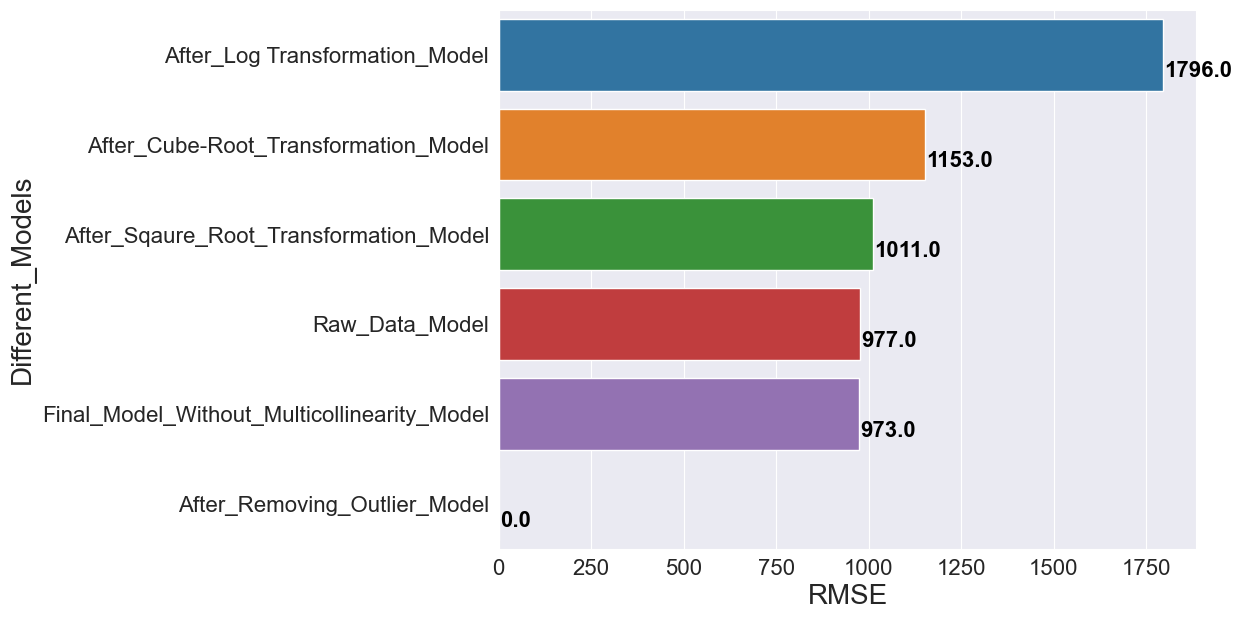

In [133]:
model_table.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(9,7))
sns.barplot(x='RMSE', y='Different_Models', data=model_table, ax = axe)
axe.set_xlabel('RMSE', size=20)
axe.set_ylabel('Different_Models', size=20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

for i, v in enumerate(np.round(model_table.RMSE.values,0)):
    axe.text(v + 3, i + .25, str(v),
    color = 'black', fontweight = 'bold', fontsize= 16)
plt.show()